In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
sns.set_context('notebook')
import scipy
import matplotlib.patches as mpatches
import pyemma
import mdtraj as md

In [2]:
distances = np.load('distances2_cisphospho.npy')
dist2_cis = [x[0][100:] for x in distances]
del distances

/anaconda3/lib/python3.6/site-packages/pyemma/__init__.py:130: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.6, you have 2.5.2.
  .format(latest=latest, current=current), category=UserWarning)


In [3]:
distances = np.load('distances3_cisphospho.npy')
dist3_cis = [x[0][100:] for x in distances]
del distances

In [4]:
distances = np.load('distances4_cisphospho.npy')
dist4_cis = [x[0][100:] for x in distances]
del distances

In [5]:
distances = np.load('distances5_cisphospho.npy')
dist5_cis = [x[0][100:] for x in distances]
del distances

In [6]:
distances2 = np.load('distances2_liam.npy')
dist2_act = [distances2[i][0][100:] for i in range(len(distances2))]

distances3 = np.load('distances3_liam.npy')
dist3_act = [distances3[i][0][100:] for i in range(len(distances3))]

distances4 = np.load('distances4_liam.npy')
dist4_act = [distances4[i][0][100:] for i in range(len(distances4))]

distances5 = np.load('distances5_liam.npy')
dist5_act = [distances5[i][0][100:] for i in range(len(distances5))]

del distances2
del distances3
del distances4
del distances5

In [7]:
dist2 = [np.concatenate([dist2_cis[i], dist2_act[i]], axis=1) for i in range(len(dist2_cis))]
dist3 = [np.concatenate([dist3_cis[i], dist3_act[i]], axis=1) for i in range(len(dist3_cis))]
dist4 = [np.concatenate([dist4_cis[i], dist4_act[i]], axis=1) for i in range(len(dist4_cis))]
dist5 = [np.concatenate([dist5_cis[i], dist5_act[i]], axis=1) for i in range(len(dist5_cis))]

In [10]:
del dist2_cis
del dist2_act
del dist3_cis
del dist3_act
del dist4_cis
del dist4_act
del dist5_cis
del dist5_act

In [11]:
distcomb = np.concatenate([dist2, dist3, dist4, dist5])

In [19]:
tica = pyemma.coordinates.tica(list(distcomb), lag=10, kinetic_map=False, commute_map=True, var_cutoff=0.95)

HBox(children=(HBox(children=(Label(value='calculate covariances'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=3989), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [20]:
Y = tica.get_output()

HBox(children=(HBox(children=(Label(value='getting output of TICA'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=3990), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [21]:
kmeans = pyemma.coordinates.cluster_kmeans(Y, k=100, max_iter=100)

HBox(children=(HBox(children=(Label(value='initialize kmeans++ centers'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='kmeans iterations'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

02-06-19 22:20:11 pyemma.coordinates.clustering.kmeans.KmeansClustering[3] INFO     Cluster centers converged after 4 steps.


In [22]:
dtrajs = kmeans.get_output()

HBox(children=(HBox(children=(Label(value='getting output of KmeansClustering'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=3990), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [23]:
np.save('cis_act_jointspace_dtrajs_100', dtrajs)

In [186]:
dtrajs = np.load('cis_act_jointspace_dtrajs_100.npy')

In [187]:
len(dist2), len(dist3), len(dist4), len(dist5)

(1000, 999, 1000, 1000)

In [32]:
its = pyemma.msm.its([np.concatenate(x) for x in dtrajs[:1000] if len(x) > 0], lags=1000)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=17), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

02-06-19 22:28:03 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[7] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


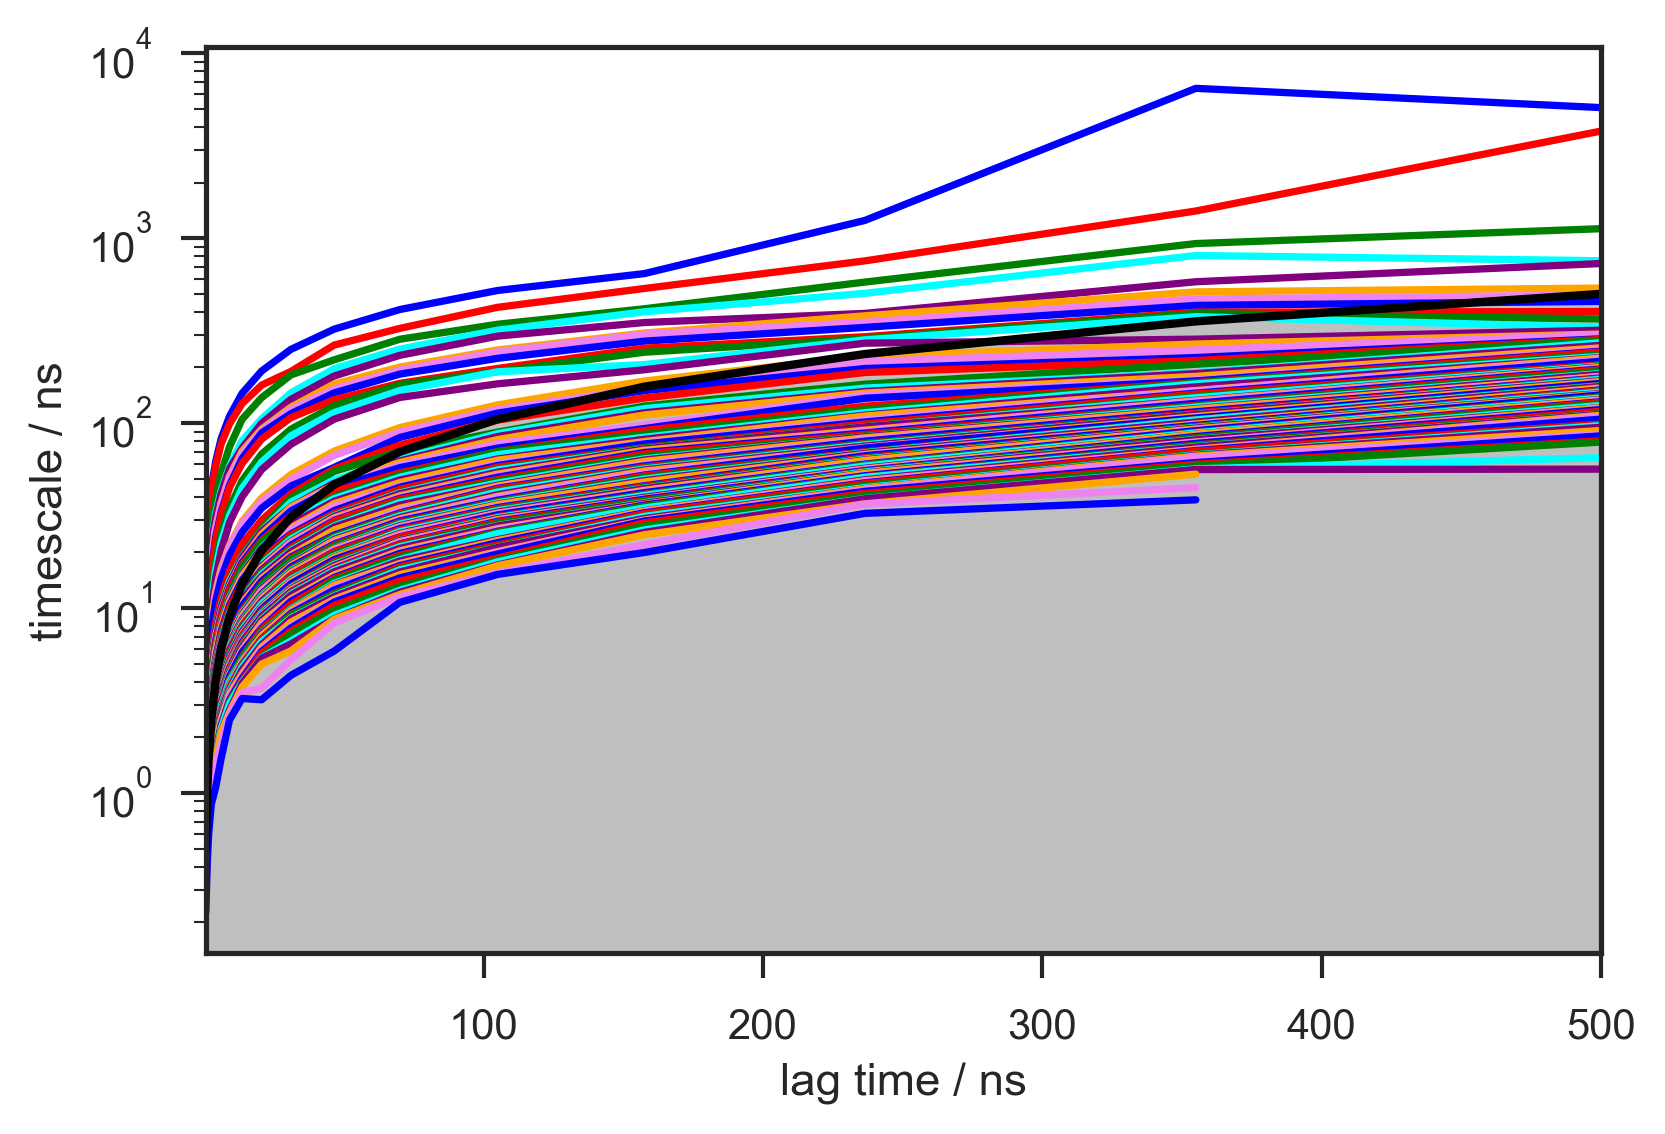

In [33]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, dt=0.5, units='ns')
plt.show()

In [34]:
its = pyemma.msm.its([np.concatenate(x) for x in dtrajs[1000:1999] if len(x) > 0], lags=1000)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=17), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

02-06-19 22:28:30 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[9] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


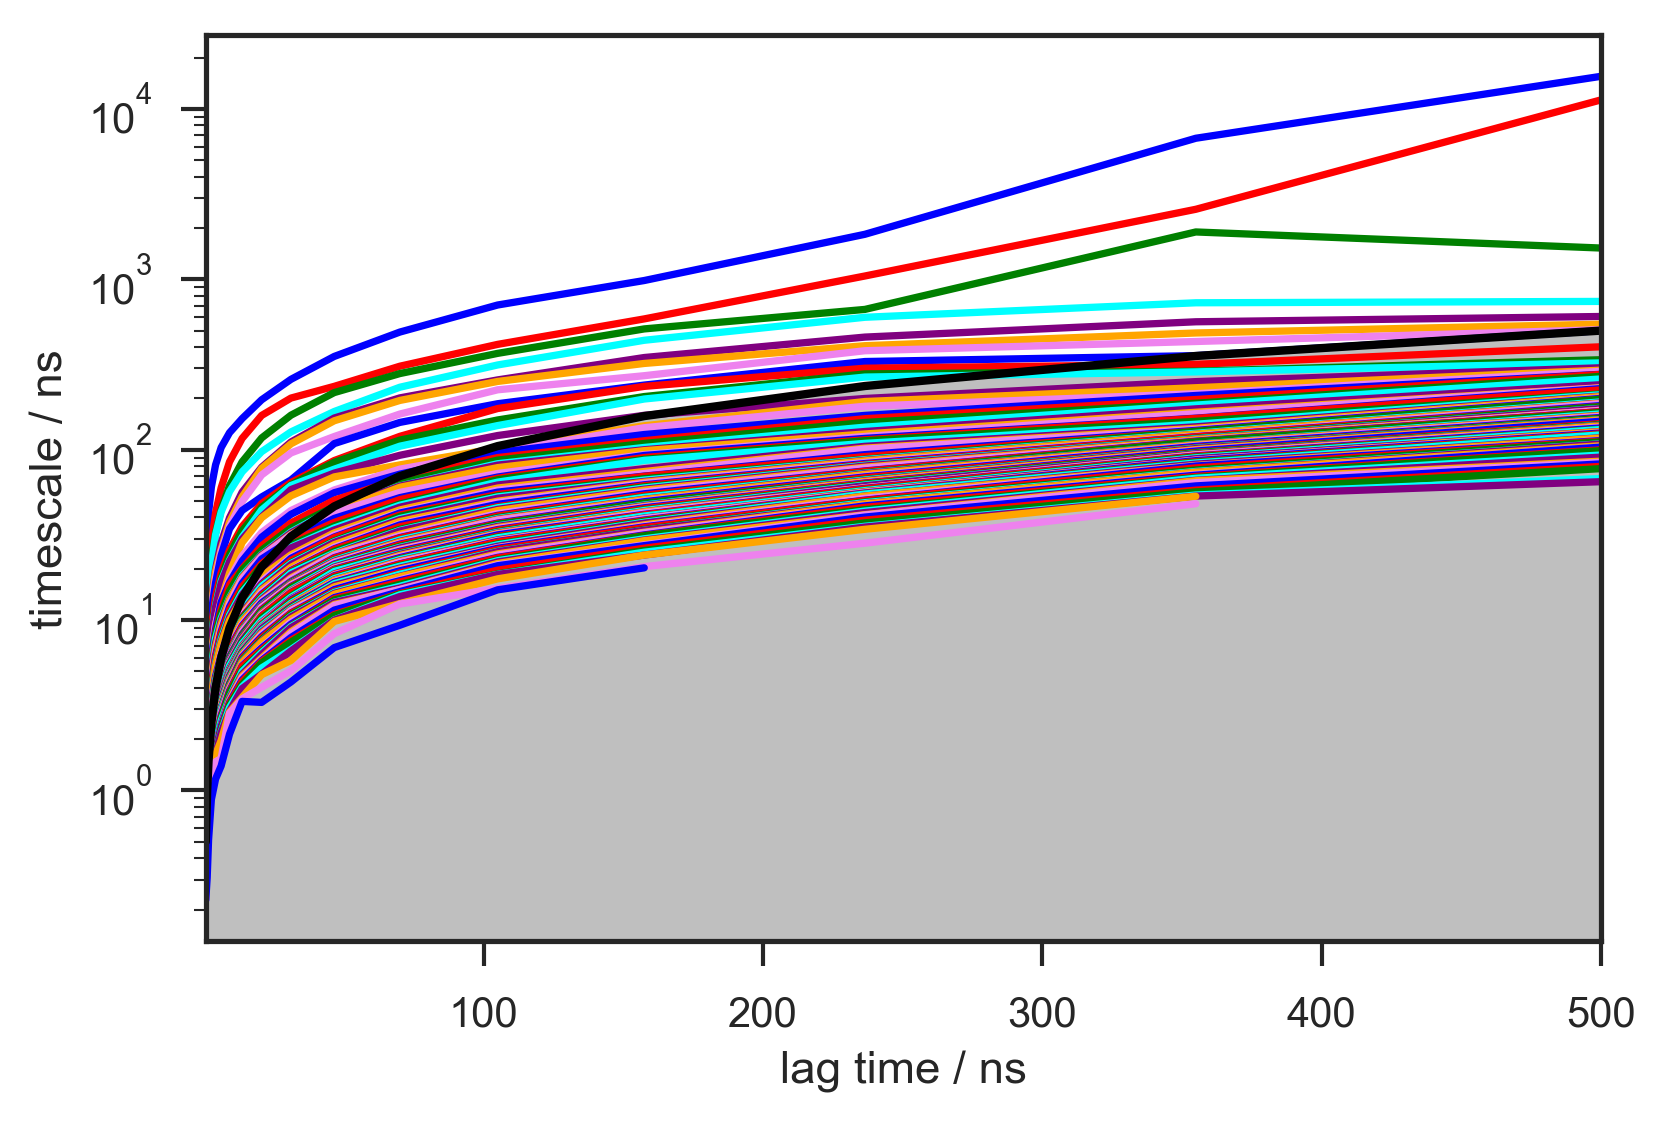

In [35]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, dt=0.5, units='ns')
plt.show()

In [36]:
its = pyemma.msm.its([np.concatenate(x) for x in dtrajs[1999:2999] if len(x) > 0], lags=1000)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=17), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

02-06-19 22:29:13 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[11] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


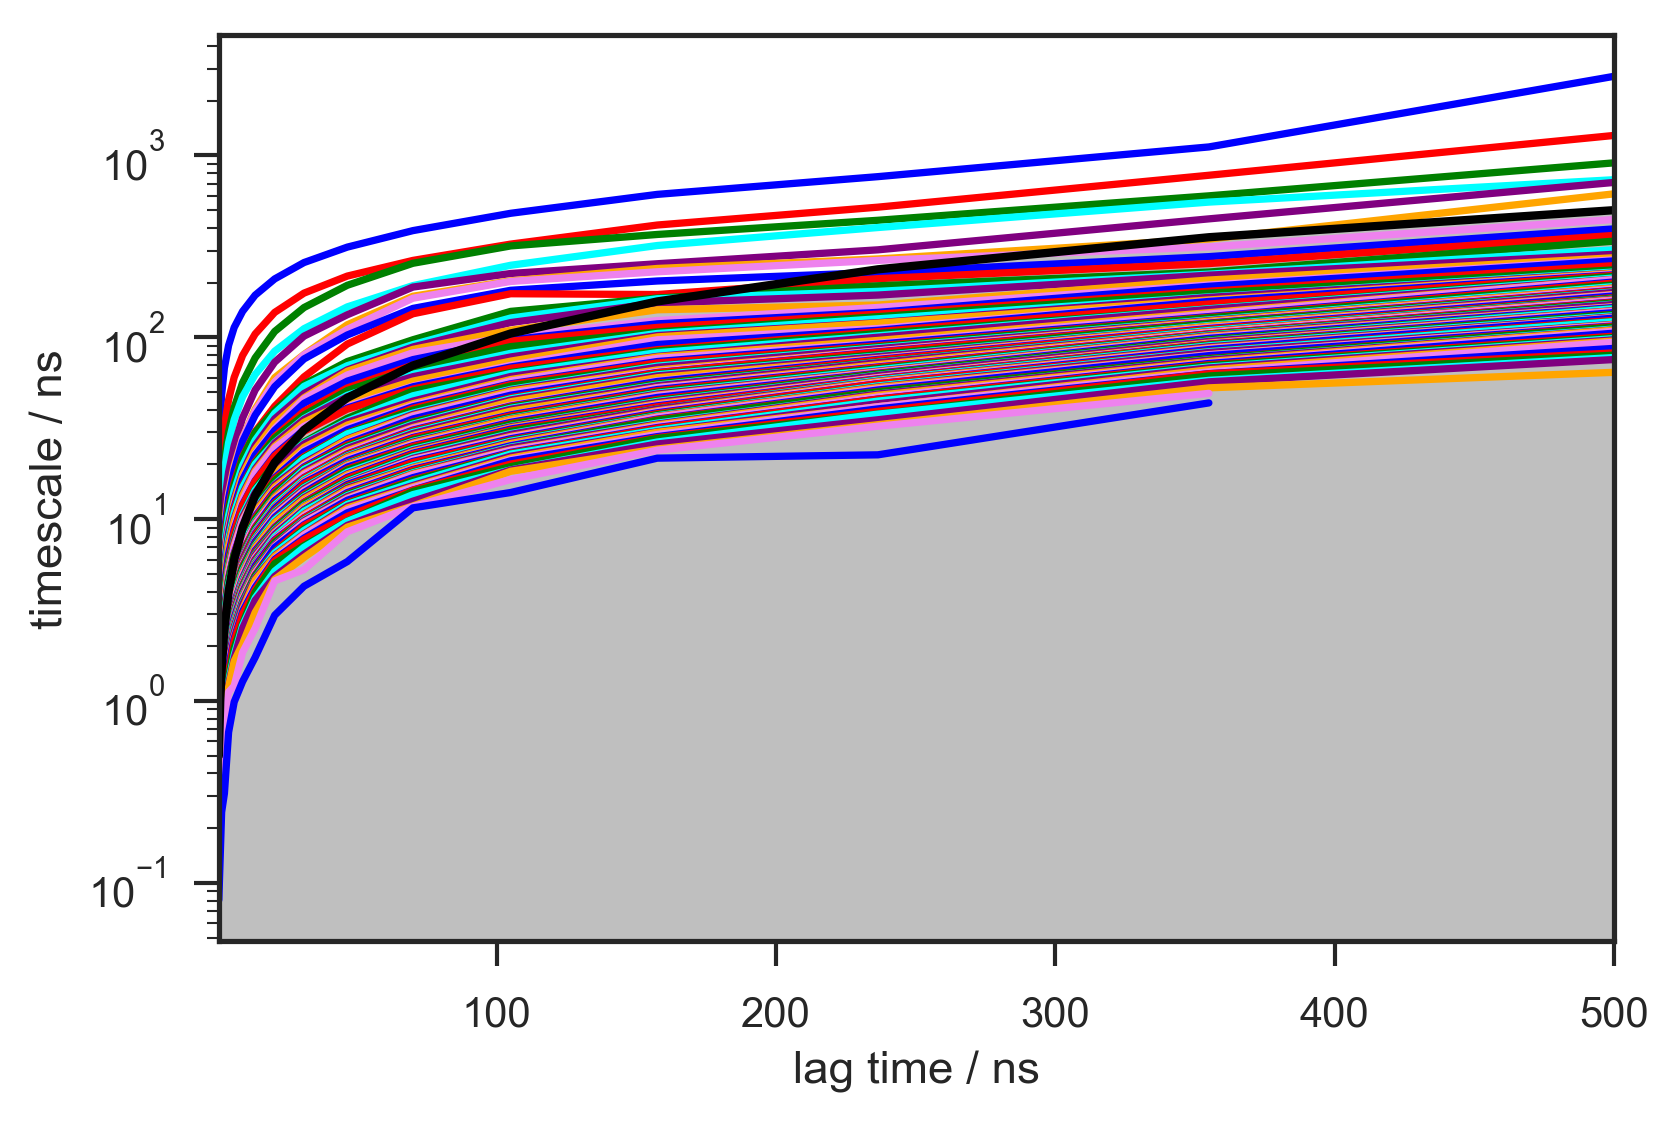

In [37]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, dt=0.5, units='ns')
plt.show()

In [38]:
its = pyemma.msm.its([np.concatenate(x) for x in dtrajs[2999:3999] if len(x) > 0], lags=1000)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=17), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

02-06-19 22:29:33 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[13] WARNING  Some timescales could not be computed. Timescales array is smaller than expected or contains NaNs


/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


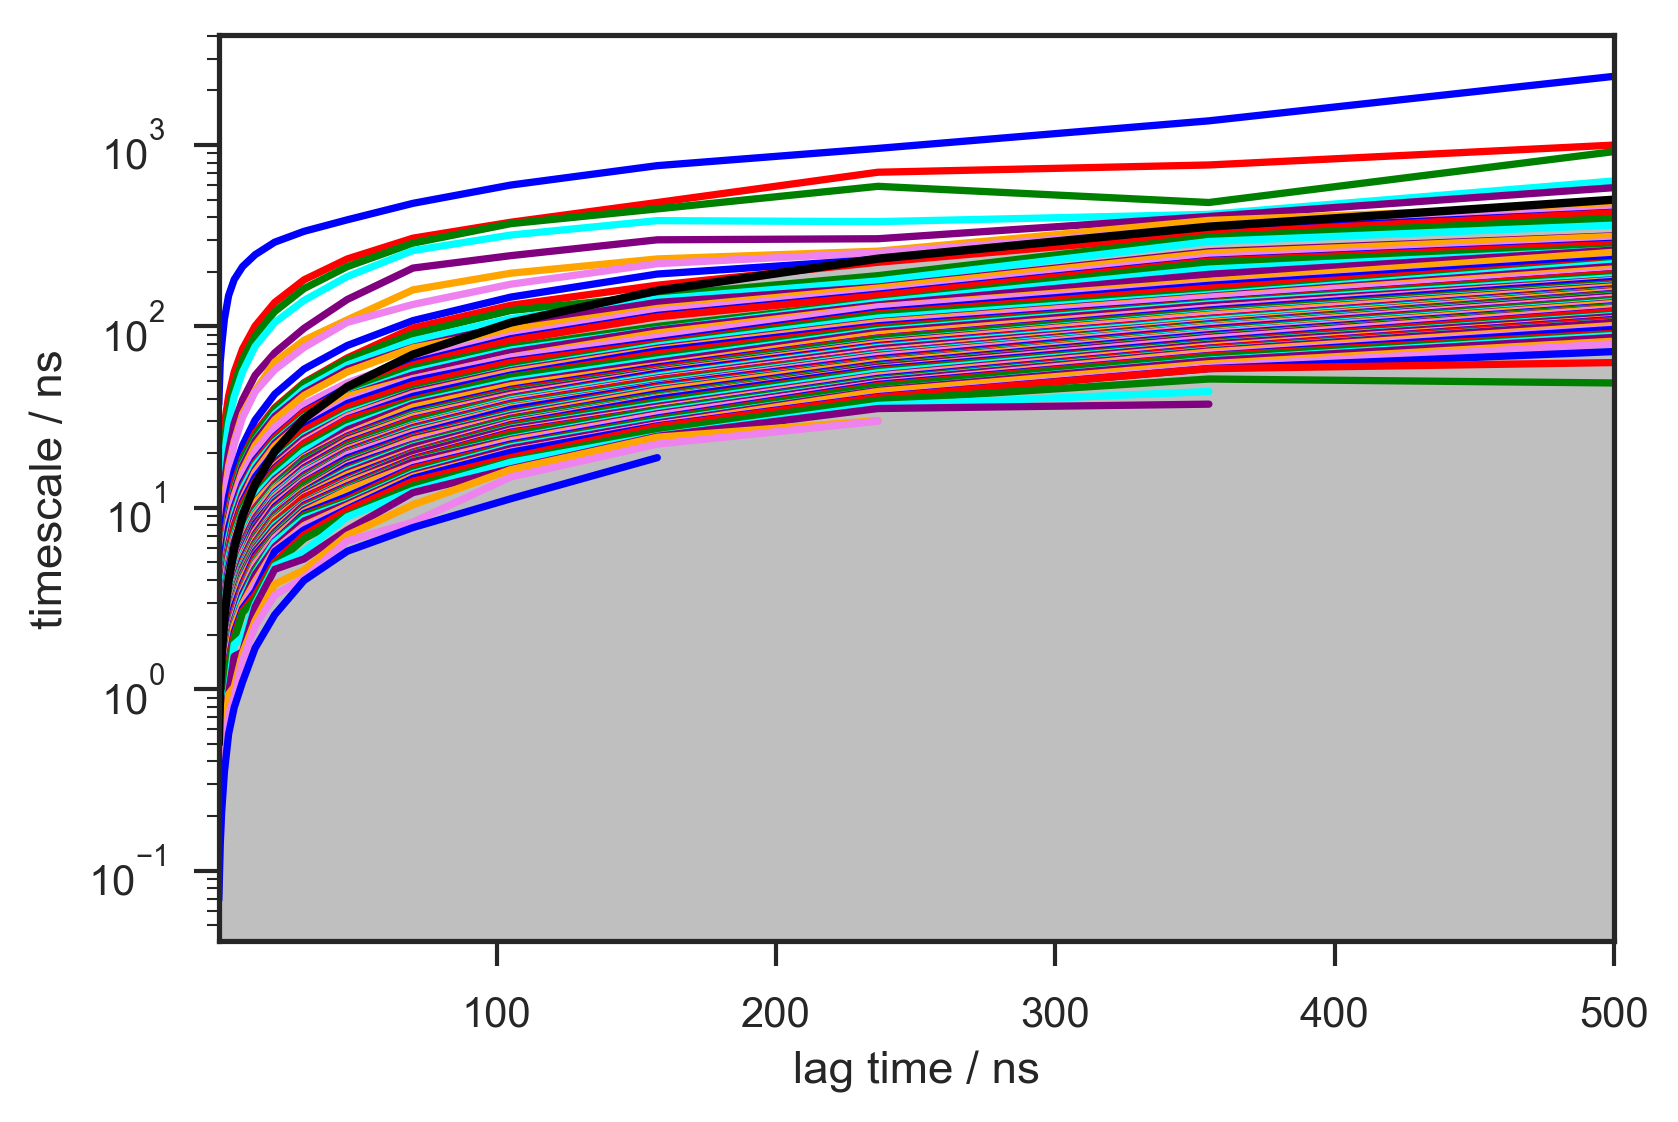

In [39]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, dt=0.5, units='ns')
plt.show()

In [40]:
its = pyemma.msm.its([np.concatenate(x) for x in dtrajs if len(x) > 0], lags=1000)

HBox(children=(HBox(children=(Label(value='estimating MaximumLikelihoodMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=17), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

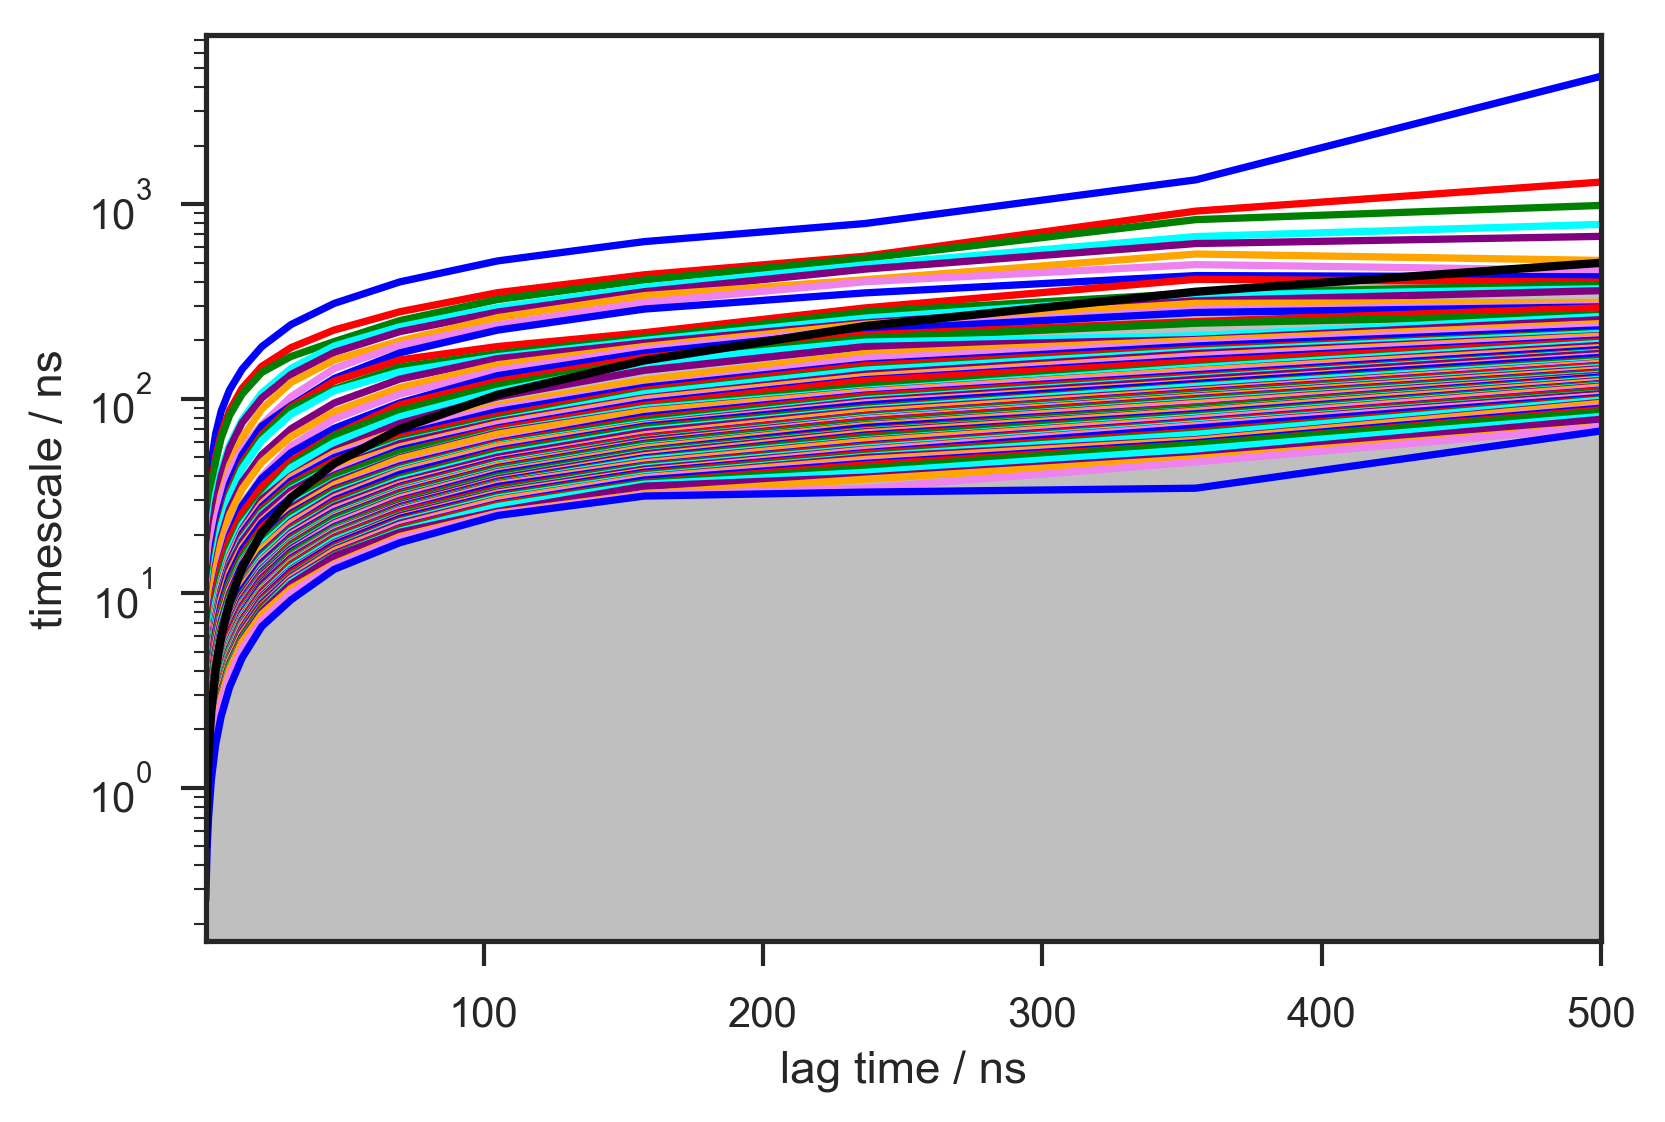

In [41]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, dt=0.5, units='ns')
plt.show()

In [42]:
# see metastable sets for all options

In [196]:
msm = pyemma.msm.estimate_markov_model([np.concatenate(x) for x in dtrajs[:1000] if len(x) > 0], lag=500)

In [197]:
pcca = msm.pcca(2)

In [198]:
pcca.metastable_sets

[array([69, 76, 82]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87,
        88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])]

In [199]:
pcca.coarse_grained_stationary_probability

array([0.06906323, 0.93093677])

In [190]:
pcca = msm.pcca(3)
pcca.coarse_grained_stationary_probability

array([0.16440992, 0.06579322, 0.76979686])

In [191]:
msm = pyemma.msm.estimate_markov_model([np.concatenate(x) for x in dtrajs[1000:1999] if len(x) > 0], lag=500)

In [63]:
pcca = msm.pcca(2)

In [64]:
pcca.metastable_sets

[array([ 9, 66, 75, 91]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69,
        70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
        88, 89, 90, 92, 93, 94, 95, 96, 97, 98])]

In [65]:
pcca.coarse_grained_stationary_probability

array([0.09120416, 0.90879584])

In [192]:
pcca = msm.pcca(3)
pcca.coarse_grained_stationary_probability

array([0.03921374, 0.08738353, 0.87340272])

In [200]:
msm = pyemma.msm.estimate_markov_model([np.concatenate(x) for x in dtrajs[1999:2999] if len(x) > 0], lag=500)

In [67]:
pcca = msm.pcca(2)

In [68]:
pcca.metastable_sets

[array([ 8,  9, 17, 39, 53, 56, 66, 69, 76, 82, 89]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 15, 16, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55,
        57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 70, 71, 72, 73, 74, 75,
        77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95,
        96, 97, 98, 99])]

In [69]:
pcca.coarse_grained_stationary_probability

array([0.16928137, 0.83071863])

In [201]:
pcca = msm.pcca(3)
pcca.coarse_grained_stationary_probability

array([0.07890824, 0.22629935, 0.69479241])

In [202]:
msm = pyemma.msm.estimate_markov_model([np.concatenate(x) for x in dtrajs[2999:3999] if len(x) > 0], lag=500)

In [77]:
pcca = msm.pcca(2)

In [78]:
pcca.metastable_sets

[array([48]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
        86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])]

In [79]:
pcca.coarse_grained_stationary_probability

array([0.02647782, 0.97352218])

In [203]:
pcca = msm.pcca(3)
pcca.coarse_grained_stationary_probability

array([0.01901408, 0.13021889, 0.85076703])

In [80]:
# ok these don't really overlap at all - so let's try taking metastable sets from each option, and calculating populations of others

In [101]:
msm = pyemma.msm.estimate_markov_model([np.concatenate(x) for x in dtrajs[:1000] if len(x) > 0], lag=500)
pcca = msm.pcca(2)

In [99]:
pcca.coarse_grained_stationary_probability

array([0.06906323, 0.93093677])

In [162]:
def get_populations(ref_dtrajs, calc_dtrajs):
    msm = pyemma.msm.estimate_markov_model([np.concatenate(x) for x in ref_dtrajs if len(x) > 0], lag=500)
    
    pcca = msm.pcca(2)
    meta_sets = pcca.metastable_sets
    
    meta_sets_transl = []
    
    for meta_set in meta_sets:
        meta_sets_transl.append([])
        for state in meta_set:
            meta_sets_transl[-1].append(msm.active_set[state])
    
    msm = pyemma.msm.estimate_markov_model([np.concatenate(x) for x in calc_dtrajs if len(x) > 0], lag=500)
    
    populations = []
    
    for meta_set in meta_sets_transl:
        populations.append(0)
        
        for state in meta_set:
            if state in msm.active_set:
                populations[-1] += msm.pi[np.argwhere(msm.active_set == state)[0,0]]
                
    return populations            

In [163]:
# WT as ref

In [164]:
get_populations(dtrajs[:1000], dtrajs[:1000])

[0.04589932564234386, 0.9541006743576561]

In [165]:
# WE'RE USING CRISP MEMBERSHIPS! -- might wanna further correct later

In [166]:
get_populations(dtrajs[:1000], dtrajs[1000:1999])

[0.001756255698706421, 0.9982437443012936]

In [167]:
get_populations(dtrajs[:1000], dtrajs[1999:2999])

[0.01676731480080967, 0.9832326851991898]

In [168]:
get_populations(dtrajs[:1000], dtrajs[2999:])

[0.0034546757237829163, 0.9965453242762169]

In [169]:
# 55N as ref

In [170]:
get_populations(dtrajs[1000:1999], dtrajs[:1000])

[0.02311724838187957, 0.9760868696970338]

In [171]:
get_populations(dtrajs[1000:1999], dtrajs[1000:1999])

[0.06849854315002157, 0.9315014568499784]

In [172]:
get_populations(dtrajs[1000:1999], dtrajs[1999:2999])

[0.013008635173164711, 0.9869903716238525]

In [173]:
get_populations(dtrajs[1000:1999], dtrajs[2999:])

[0.007782416787710869, 0.9922175832122888]

In [174]:
# Q103M as ref

In [175]:
get_populations(dtrajs[1999:2999], dtrajs[:1000])

[0.09655877041932812, 0.9034412295806719]

In [176]:
get_populations(dtrajs[1999:2999], dtrajs[1000:1999])

[0.08117486191169264, 0.9188251380883075]

In [177]:
get_populations(dtrajs[1999:2999], dtrajs[1999:2999])

[0.07377688882510762, 0.9262231111748921]

In [178]:
get_populations(dtrajs[1999:2999], dtrajs[2999:3999])

[0.02083292424698937, 0.9791670757530102]

In [179]:
# 55N - Q103M as ref

In [180]:
get_populations(dtrajs[2999:], dtrajs[:1000])

[0.008361493580426158, 0.9908426244984874]

In [181]:
get_populations(dtrajs[2999:], dtrajs[1000:1999])

[0.0009603212608054773, 0.9990396787391945]

In [182]:
get_populations(dtrajs[2999:], dtrajs[1999:2999])

[0.0005984649938918468, 0.9994005418031254]

In [183]:
get_populations(dtrajs[2999:], dtrajs[2999:])

[0.006822540122906221, 0.9931774598770936]

In [184]:
# DECISION - use this state space, but keep metastable states separate for each system - decide if 2 or 3
# draw samples from them - see if we have a non-disturbed / disturbed separation, and show those with populations

In [204]:
# did both 2 and 3 macrostates above -- by populations 2 is better, keep that

In [205]:
# NEXT: SAMPLE FROM THOSE STATES FOR EACH SYSTEM

In [206]:
from msmbuilder.io.sampling import sample_dimension

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [214]:
# which trajectories have been removed due to 0 length

In [215]:
for i,x in enumerate(dtrajs[:1000]):
    if len(x) > 0:
        continue
    else:
        print(i)

592
803


In [216]:
for i,x in enumerate(dtrajs[1000:1999]):
    if len(x) > 0:
        continue
    else:
        print(i)

In [217]:
for i,x in enumerate(dtrajs[1999:2999]):
    if len(x) > 0:
        continue
    else:
        print(i)

491
647
668
950


In [218]:
for i,x in enumerate(dtrajs[2999:]):
    if len(x) > 0:
        continue
    else:
        print(i)

317
369
928


In [ ]:
# WT

In [209]:
msm = pyemma.msm.estimate_markov_model([np.concatenate(x) for x in dtrajs[:1000] if len(x) > 0], lag=500)
pcca = msm.pcca(2)
meta_sets = pcca.metastable_sets

state_indexes = []

for i in range(len(msm.active_set)):
    if i in meta_sets[0]:
        state_indexes.append(msm.active_state_indexes[i])
    
state_indexes = np.concatenate(state_indexes)

state_indexes = state_indexes[np.random.choice(len(state_indexes), 100, replace=False)]

np.save('joint_statespace_samples/wt_state0', state_indexes)

state_indexes = []

for i in range(len(msm.active_set)):
    if i in meta_sets[1]:
        state_indexes.append(msm.active_state_indexes[i])
    
state_indexes = np.concatenate(state_indexes)

state_indexes = state_indexes[np.random.choice(len(state_indexes), 100, replace=False)]

np.save('joint_statespace_samples/wt_state1', state_indexes)

In [225]:
msm = pyemma.msm.estimate_markov_model([np.concatenate(x) for x in dtrajs[1000:1999] if len(x) > 0], lag=500)
pcca = msm.pcca(2)
meta_sets = pcca.metastable_sets

state_indexes = []

for i in range(len(msm.active_set)):
    if i in meta_sets[0]:
        state_indexes.append(msm.active_state_indexes[i])
    
state_indexes = np.concatenate(state_indexes)

state_indexes = state_indexes[np.random.choice(len(state_indexes), 100, replace=False)]

np.save('joint_statespace_samples/55n_state0', state_indexes)

state_indexes = []

for i in range(len(msm.active_set)):
    if i in meta_sets[1]:
        state_indexes.append(msm.active_state_indexes[i])
    
state_indexes = np.concatenate(state_indexes)

state_indexes = state_indexes[np.random.choice(len(state_indexes), 100, replace=False)]

np.save('joint_statespace_samples/55n_state1', state_indexes)

In [226]:
msm = pyemma.msm.estimate_markov_model([np.concatenate(x) for x in dtrajs[1999:2999] if len(x) > 0], lag=500)
pcca = msm.pcca(2)
meta_sets = pcca.metastable_sets

state_indexes = []

for i in range(len(msm.active_set)):
    if i in meta_sets[0]:
        state_indexes.append(msm.active_state_indexes[i])
    
state_indexes = np.concatenate(state_indexes)

state_indexes = state_indexes[np.random.choice(len(state_indexes), 100, replace=False)]

np.save('joint_statespace_samples/q103m_state0', state_indexes)

state_indexes = []

for i in range(len(msm.active_set)):
    if i in meta_sets[1]:
        state_indexes.append(msm.active_state_indexes[i])
    
state_indexes = np.concatenate(state_indexes)

state_indexes = state_indexes[np.random.choice(len(state_indexes), 100, replace=False)]

np.save('joint_statespace_samples/q103m_state1', state_indexes)

In [227]:
msm = pyemma.msm.estimate_markov_model([np.concatenate(x) for x in dtrajs[2999:] if len(x) > 0], lag=500)
pcca = msm.pcca(2)
meta_sets = pcca.metastable_sets

state_indexes = []

for i in range(len(msm.active_set)):
    if i in meta_sets[0]:
        state_indexes.append(msm.active_state_indexes[i])
    
state_indexes = np.concatenate(state_indexes)

state_indexes = state_indexes[np.random.choice(len(state_indexes), 100, replace=False)]

np.save('joint_statespace_samples/55n_q103m_state0', state_indexes)

state_indexes = []

for i in range(len(msm.active_set)):
    if i in meta_sets[1]:
        state_indexes.append(msm.active_state_indexes[i])
    
state_indexes = np.concatenate(state_indexes)

state_indexes = state_indexes[np.random.choice(len(state_indexes), 100, replace=False)]

np.save('joint_statespace_samples/55n_q103m_state1', state_indexes)

In [228]:
pwd

'/Users/rafalpwiewiora/repos/ERK_take2'

In [261]:
# ok so this looks good - now for each msm, let's look at the distances most correlated with first eigenvector - top5
# also look at top5 of only the activity associated ones

In [234]:
distances = np.load('distances2_cisphospho.npy')
indexes = distances[0][1]
del distances

distances = np.load('distances2_liam.npy')
indexes2 = distances[0][1]
del distances

indexes = np.concatenate([indexes, indexes2])

In [280]:
msm = pyemma.msm.estimate_markov_model([np.concatenate(x) for x in dtrajs[:1000] if len(x) > 0], lag=500)

In [281]:
dist2_ = [x for i,x in enumerate(dist2) if i not in [592,803]]

In [282]:
eigen_traj = []

for state in np.argsort(msm.eigenvectors_right(2)[:,1]):
    eigen_traj.append(msm.active_state_indexes[state][np.random.choice(len(msm.active_state_indexes[state]), 100, replace=False)])
    
eigen_traj = np.concatenate(eigen_traj)

eigen_traj_dist = []

for x in eigen_traj:
    eigen_traj_dist.append(dist2_[x[0]][x[1]])
    
eigen_traj_dist = np.array(eigen_traj_dist)    

sorted_eigenv = msm.eigenvectors_right(2)[:,1][np.argsort(msm.eigenvectors_right(2)[:,1])]
sorted_eigenv = np.concatenate([[x]*100 for x in sorted_eigenv])

corr_coeffs = []

for i in range(80):
    corr_coeffs.append(np.corrcoef(sorted_eigenv, eigen_traj_dist[:,i])[0,1])
    
corr_coeffs = np.abs(corr_coeffs)    

In [272]:
indexes[np.argsort(corr_coeffs)[::-1][:5]], np.sort(corr_coeffs)[::-1][:5]

(array([[166, 184],
        [184, 145],
        [164, 184],
        [183, 149],
        [183, 147]]),
 array([0.56406413, 0.5292618 , 0.52057497, 0.4984132 , 0.47328593]))

In [274]:
indexes[66:][np.argsort(corr_coeffs[66:])[::-1][:5]], np.sort(corr_coeffs[66:])[::-1][:5]

(array([[143, 206],
        [ 35,  48],
        [104, 213],
        [151, 104],
        [ 71, 164]]),
 array([0.05863569, 0.04827676, 0.04174356, 0.03499727, 0.01931126]))

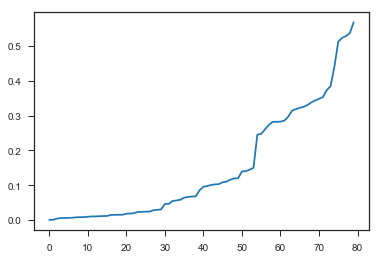

In [284]:
plt.plot(np.sort(corr_coeffs))

In [285]:
msm = pyemma.msm.estimate_markov_model([np.concatenate(x) for x in dtrajs[1000:1999] if len(x) > 0], lag=500)

In [286]:
dist3_ = dist3

In [289]:
eigen_traj = []

for state in np.argsort(msm.eigenvectors_right(2)[:,1]):
    eigen_traj.append(msm.active_state_indexes[state][np.random.choice(len(msm.active_state_indexes[state]), 100, replace=True)])
    
eigen_traj = np.concatenate(eigen_traj)

eigen_traj_dist = []

for x in eigen_traj:
    eigen_traj_dist.append(dist3_[x[0]][x[1]])
    
eigen_traj_dist = np.array(eigen_traj_dist)    

sorted_eigenv = msm.eigenvectors_right(2)[:,1][np.argsort(msm.eigenvectors_right(2)[:,1])]
sorted_eigenv = np.concatenate([[x]*100 for x in sorted_eigenv])

corr_coeffs = []

for i in range(80):
    corr_coeffs.append(np.corrcoef(sorted_eigenv, eigen_traj_dist[:,i])[0,1])
    
corr_coeffs = np.abs(corr_coeffs)      

In [290]:
indexes[np.argsort(corr_coeffs)[::-1][:5]], np.sort(corr_coeffs)[::-1][:5]

(array([[181, 145],
        [164, 181],
        [ 71, 181],
        [166, 184],
        [166, 181]]),
 array([0.58922708, 0.55163584, 0.50749601, 0.42880665, 0.40004302]))

In [291]:
indexes[66:][np.argsort(corr_coeffs[66:])[::-1][:5]], np.sort(corr_coeffs[66:])[::-1][:5]

(array([[143, 206],
        [163,  50],
        [ 48, 152],
        [ 50,  67],
        [164, 143]]),
 array([0.0741441 , 0.06322783, 0.04582944, 0.0365989 , 0.03254165]))

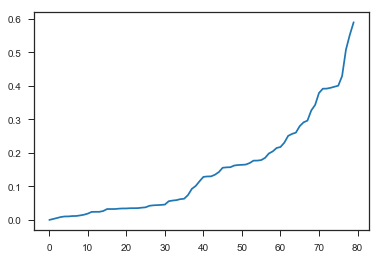

In [292]:
plt.plot(np.sort(corr_coeffs))

In [306]:
msm = pyemma.msm.estimate_markov_model([np.concatenate(x) for x in dtrajs[1999:2999] if len(x) > 0], lag=500)

In [307]:
dist4_ = [x for i,x in enumerate(dist4) if i not in [491,647,668,950]]

In [308]:
eigen_traj = []

for state in np.argsort(msm.eigenvectors_right(2)[:,1]):
    eigen_traj.append(msm.active_state_indexes[state][np.random.choice(len(msm.active_state_indexes[state]), 100, replace=True)])
    
eigen_traj = np.concatenate(eigen_traj)

eigen_traj_dist = []

for x in eigen_traj:
    eigen_traj_dist.append(dist4_[x[0]][x[1]])
    
eigen_traj_dist = np.array(eigen_traj_dist)    

sorted_eigenv = msm.eigenvectors_right(2)[:,1][np.argsort(msm.eigenvectors_right(2)[:,1])]
sorted_eigenv = np.concatenate([[x]*100 for x in sorted_eigenv])

corr_coeffs = []

for i in range(80):
    corr_coeffs.append(np.corrcoef(sorted_eigenv, eigen_traj_dist[:,i])[0,1])
    
corr_coeffs = np.abs(corr_coeffs)

In [298]:
indexes[np.argsort(corr_coeffs)[::-1][:5]], np.sort(corr_coeffs)[::-1][:5]

(array([[164, 184],
        [166, 184],
        [ 71, 184],
        [184, 145],
        [ 82, 184]]),
 array([0.75750024, 0.69984054, 0.66084568, 0.56360914, 0.53319564]))

In [299]:
indexes[66:][np.argsort(corr_coeffs[66:])[::-1][:5]], np.sort(corr_coeffs[66:])[::-1][:5]

(array([[164, 143],
        [ 67, 164],
        [143, 206],
        [104, 213],
        [163,  50]]),
 array([0.14371231, 0.08523147, 0.07224806, 0.05927588, 0.05810127]))

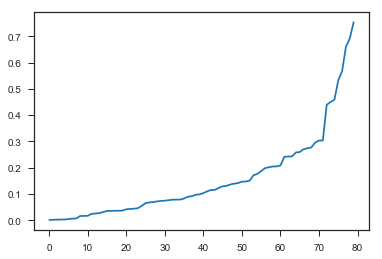

In [309]:
plt.plot(np.sort(corr_coeffs))

In [310]:
msm = pyemma.msm.estimate_markov_model([np.concatenate(x) for x in dtrajs[2999:] if len(x) > 0], lag=500)

In [311]:
dist5_ = [x for i,x in enumerate(dist5) if i not in [317,369,928]]

In [312]:
eigen_traj = []

for state in np.argsort(msm.eigenvectors_right(2)[:,1]):
    eigen_traj.append(msm.active_state_indexes[state][np.random.choice(len(msm.active_state_indexes[state]), 100, replace=True)])
    
eigen_traj = np.concatenate(eigen_traj)

eigen_traj_dist = []

for x in eigen_traj:
    eigen_traj_dist.append(dist5_[x[0]][x[1]])
    
eigen_traj_dist = np.array(eigen_traj_dist)    

sorted_eigenv = msm.eigenvectors_right(2)[:,1][np.argsort(msm.eigenvectors_right(2)[:,1])]
sorted_eigenv = np.concatenate([[x]*100 for x in sorted_eigenv])

corr_coeffs = []

for i in range(80):
    corr_coeffs.append(np.corrcoef(sorted_eigenv, eigen_traj_dist[:,i])[0,1])
    
corr_coeffs = np.abs(corr_coeffs)

In [304]:
indexes[np.argsort(corr_coeffs)[::-1][:5]], np.sort(corr_coeffs)[::-1][:5]

(array([[164, 181],
        [181, 145],
        [ 71, 181],
        [166, 181],
        [ 82, 181]]),
 array([0.43158966, 0.41993061, 0.40555654, 0.36044289, 0.32863958]))

In [305]:
indexes[66:][np.argsort(corr_coeffs[66:])[::-1][:5]], np.sort(corr_coeffs[66:])[::-1][:5]

(array([[ 82,  71],
        [104, 213],
        [143, 206],
        [163,  50],
        [ 48, 152]]),
 array([0.10755207, 0.05125716, 0.03747988, 0.03497046, 0.02844964]))

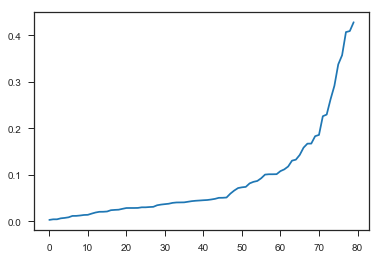

In [313]:
plt.plot(np.sort(corr_coeffs))

In [314]:
# so figure is going to be -- structures of the two states for all systems + histograms of some most correlated distances
# + differential contacts between the 'disturbed' state and the 'normal' one plotted on the structure 
# so we can propose mutations

In [315]:
# DECIDE WHAT DISTANCES TO PLOT

In [316]:
# ok I'm not looking at the correlations, rather just the proposed mechanism: 
# L168 - V186
# Y185 - D147
# D147 - T188
# T188 - K149

In [317]:
# actually probably wanna show just one or two of these in the main figure -- rest in a supplemental?

In [318]:
# ok so get these distances from the arrays here and plot

In [319]:
# wt

In [337]:
search = [166,184]

for i,x in enumerate(indexes):
    if x[0] == search[0] and x[1] == search[1]:
        print(i)

38


In [338]:
search = [183,145]

for i,x in enumerate(indexes):
    if x[0] == search[0] and x[1] == search[1]:
        print(i)

53


In [340]:
search = [186,145]

for i,x in enumerate(indexes):
    if x[0] == search[0] and x[1] == search[1]:
        print(i)

60


In [341]:
search = [186,147]

for i,x in enumerate(indexes):
    if x[0] == search[0] and x[1] == search[1]:
        print(i)

61


In [399]:
samples0 = np.load('joint_statespace_samples/wt_state0.npy')
samples1 = np.load('joint_statespace_samples/wt_state1.npy')

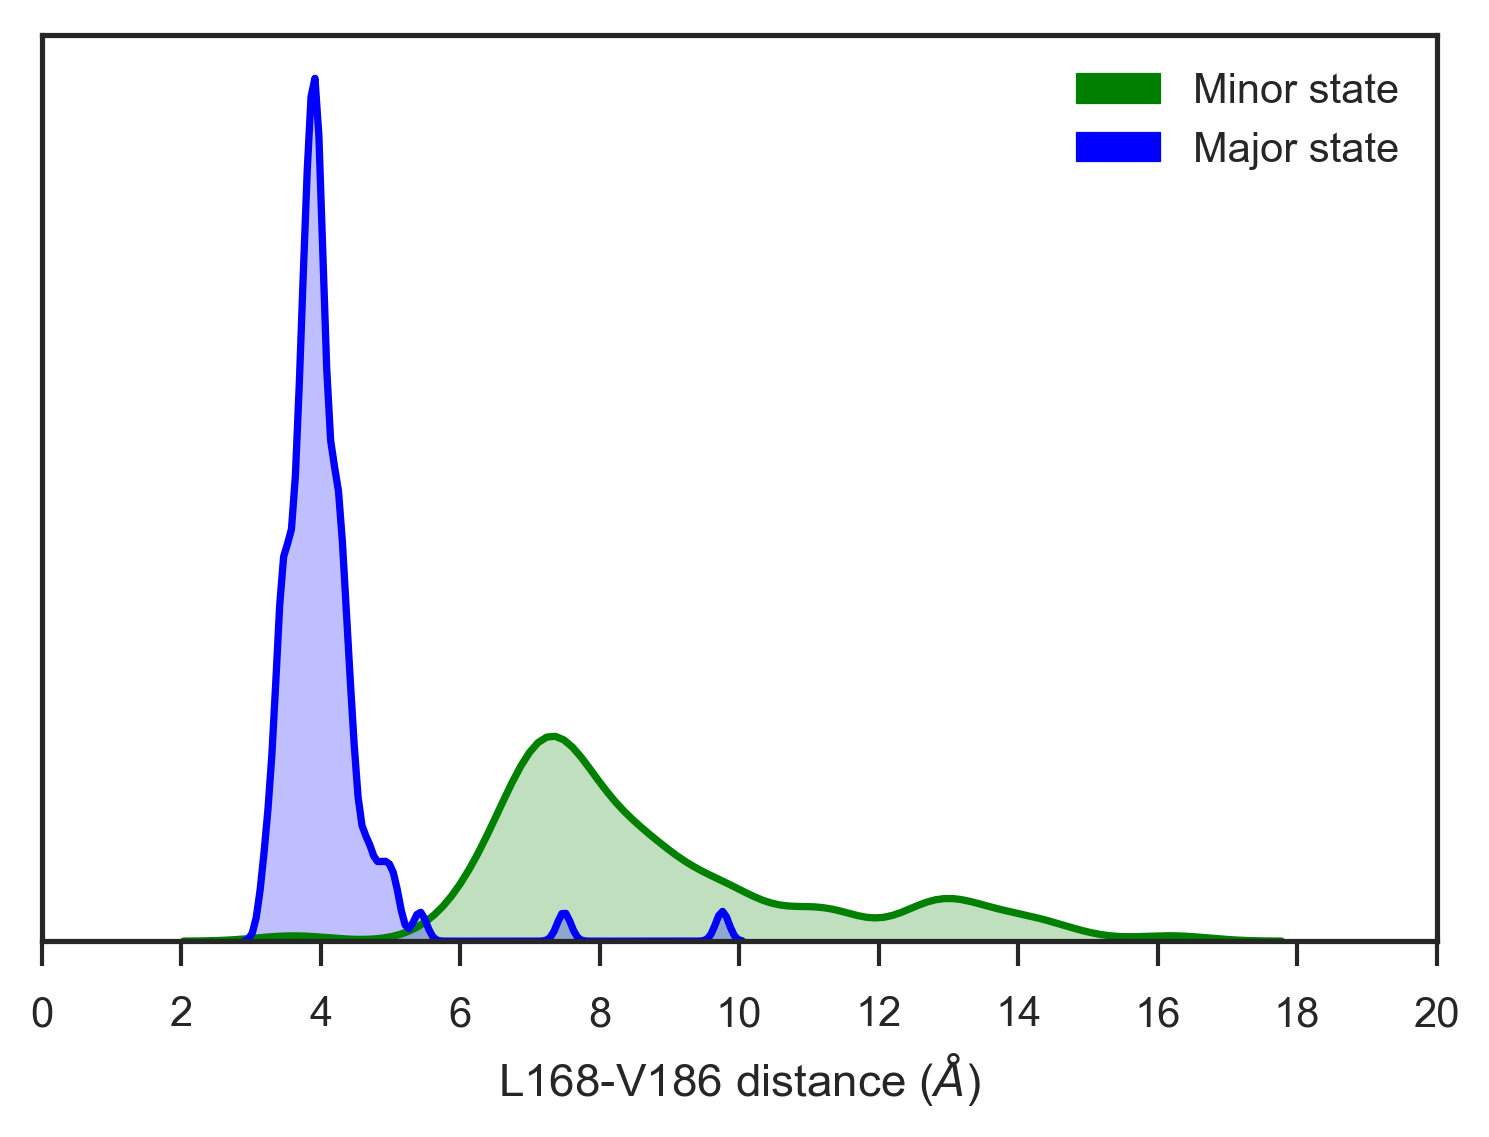

In [380]:
dist = 38

plt.figure(dpi=300)
sns.kdeplot([dist2_[x[0]][x[1]][dist]*10 for x in samples0]*10, color='green', shade=True)
sns.kdeplot([dist2_[x[0]][x[1]][dist]*10 for x in samples1]*10, color='blue', shade=True)
plt.xlabel('L168-V186 distance ($\AA$)')
plt.yticks([])
plt.xlim((0,20))
plt.xticks(range(0,22,2))

patch1 = mpatches.Patch(color='green', label='Minor state')
patch2 = mpatches.Patch(color='blue', label='Major state')
plt.legend(handles=[patch1, patch2])

plt.show()

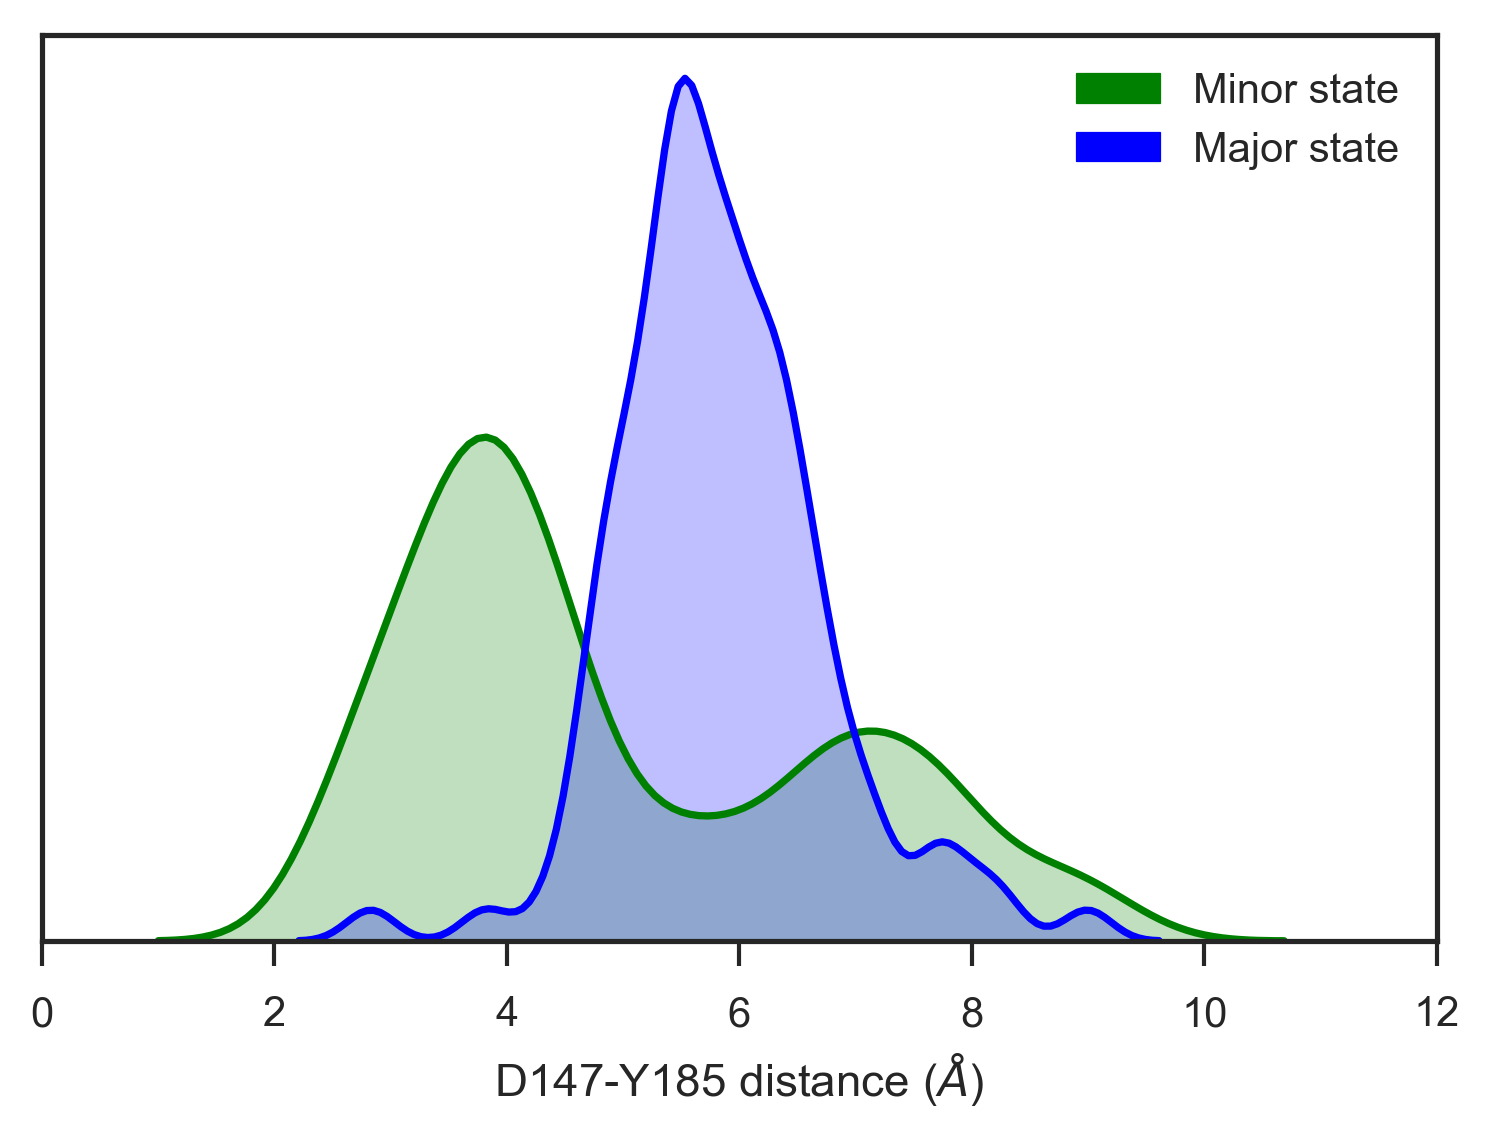

In [386]:
dist = 53 

plt.figure(dpi=300)
sns.kdeplot([dist2_[x[0]][x[1]][dist]*10 for x in samples0]*10, color='green', shade=True)
sns.kdeplot([dist2_[x[0]][x[1]][dist]*10 for x in samples1]*10, color='blue', shade=True)
plt.xlabel('D147-Y185 distance ($\AA$)')
plt.yticks([])
plt.xlim((0,12))
#plt.xticks(range(0,22,2))

patch1 = mpatches.Patch(color='green', label='Minor state')
patch2 = mpatches.Patch(color='blue', label='Major state')
plt.legend(handles=[patch1, patch2])

plt.show()

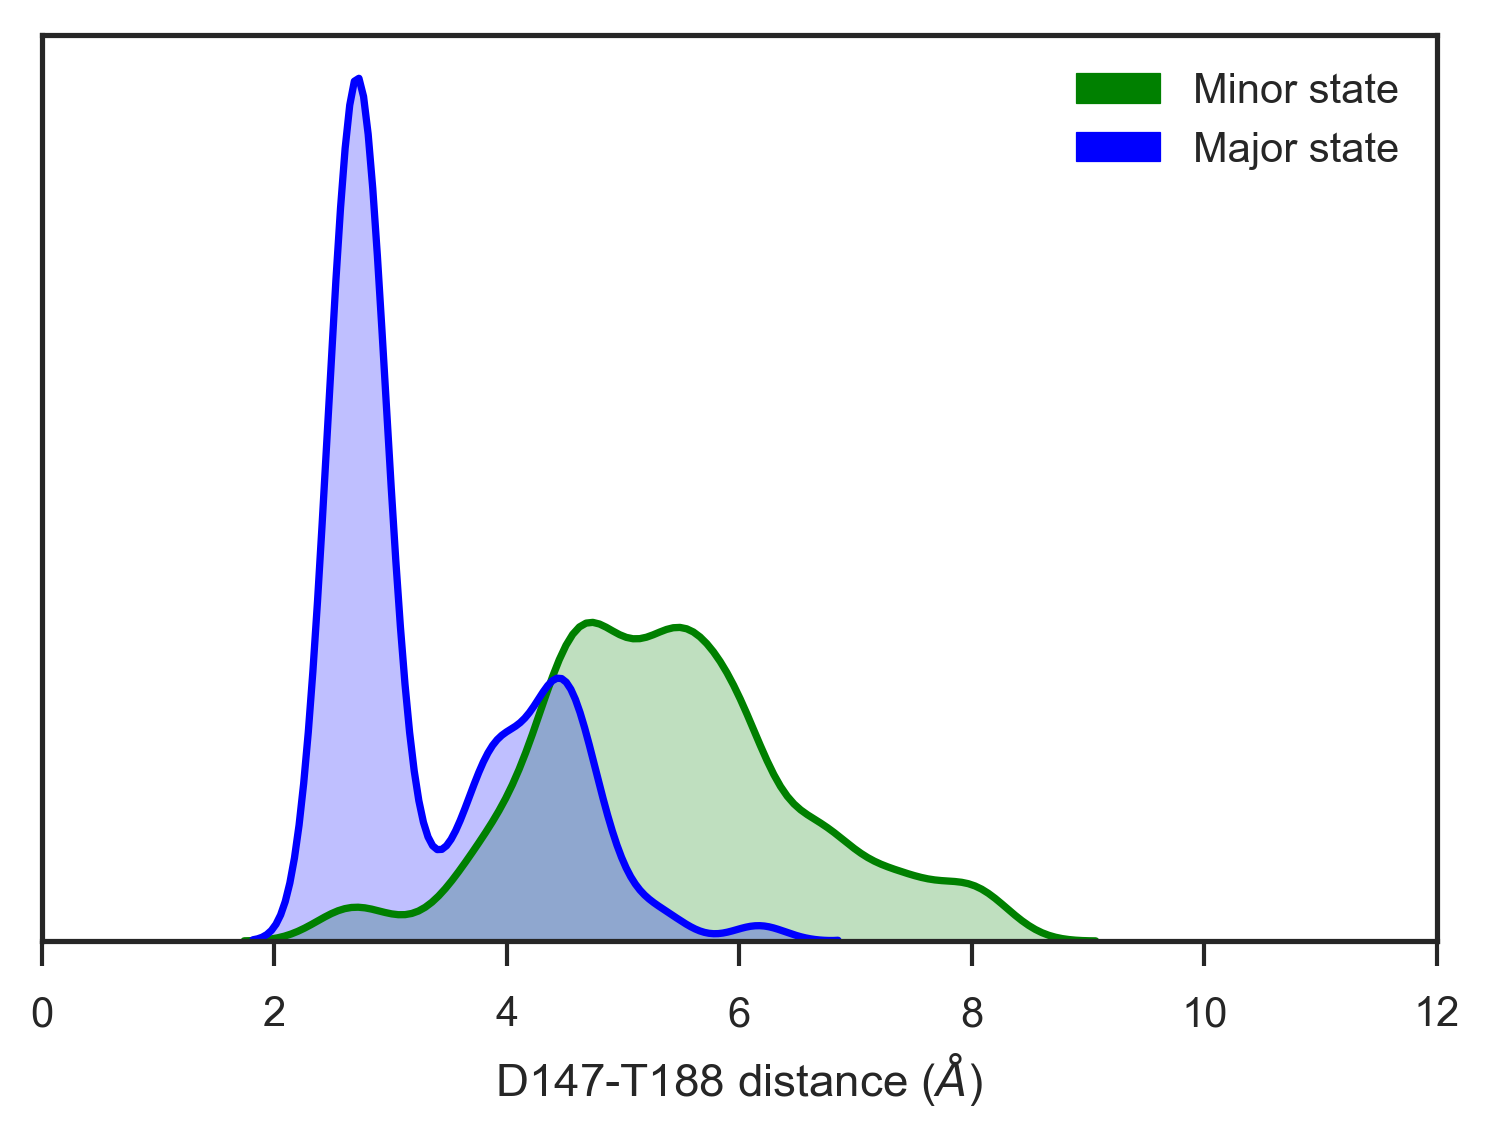

In [387]:
dist = 60

plt.figure(dpi=300)
sns.kdeplot([dist2_[x[0]][x[1]][dist]*10 for x in samples0]*10, color='green', shade=True)
sns.kdeplot([dist2_[x[0]][x[1]][dist]*10 for x in samples1]*10, color='blue', shade=True)
plt.xlabel('D147-T188 distance ($\AA$)')
plt.yticks([])
plt.xlim((0,12))
#plt.xticks(range(0,22,2))

patch1 = mpatches.Patch(color='green', label='Minor state')
patch2 = mpatches.Patch(color='blue', label='Major state')
plt.legend(handles=[patch1, patch2])

plt.show()

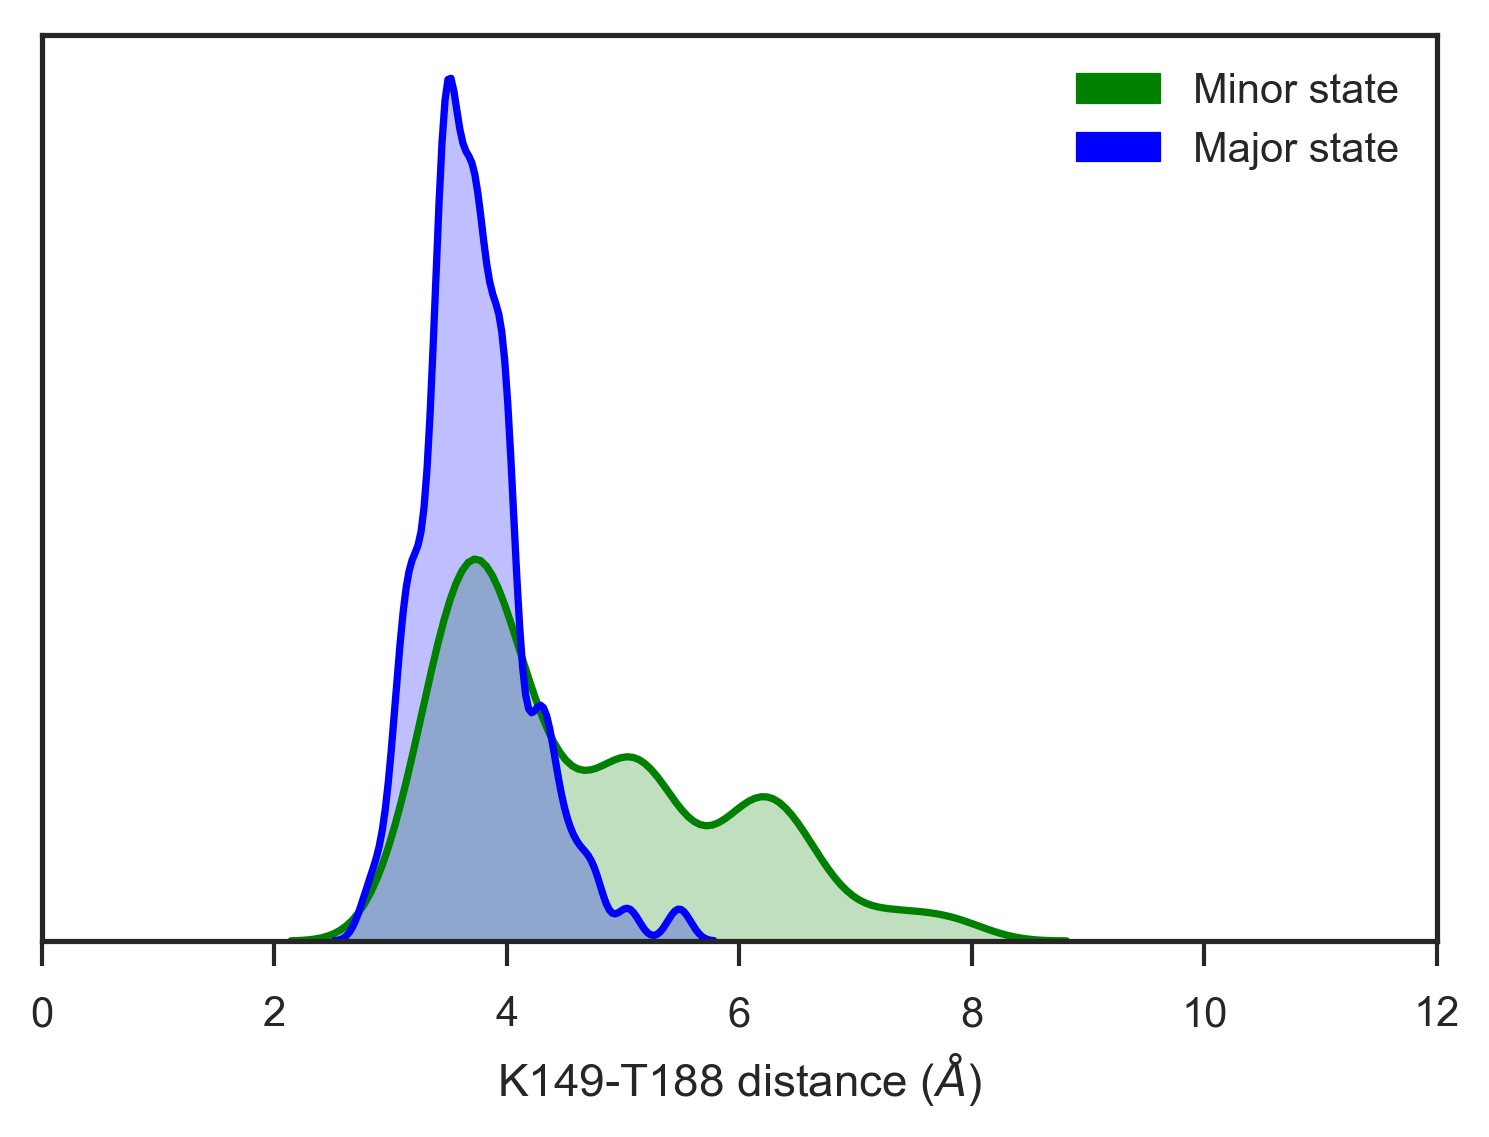

In [400]:
dist = 61

plt.figure(dpi=300)
sns.kdeplot([dist2_[x[0]][x[1]][dist]*10 for x in samples0]*10, color='green', shade=True)
sns.kdeplot([dist2_[x[0]][x[1]][dist]*10 for x in samples1]*10, color='blue', shade=True)
plt.xlabel('K149-T188 distance ($\AA$)')
plt.yticks([])
plt.xlim((0,12))

patch1 = mpatches.Patch(color='green', label='Minor state')
patch2 = mpatches.Patch(color='blue', label='Major state')
plt.legend(handles=[patch1, patch2])

plt.show()

In [364]:
# 55n

In [402]:
samples0 = np.load('joint_statespace_samples/55n_state0.npy')
samples1 = np.load('joint_statespace_samples/55n_state1.npy')

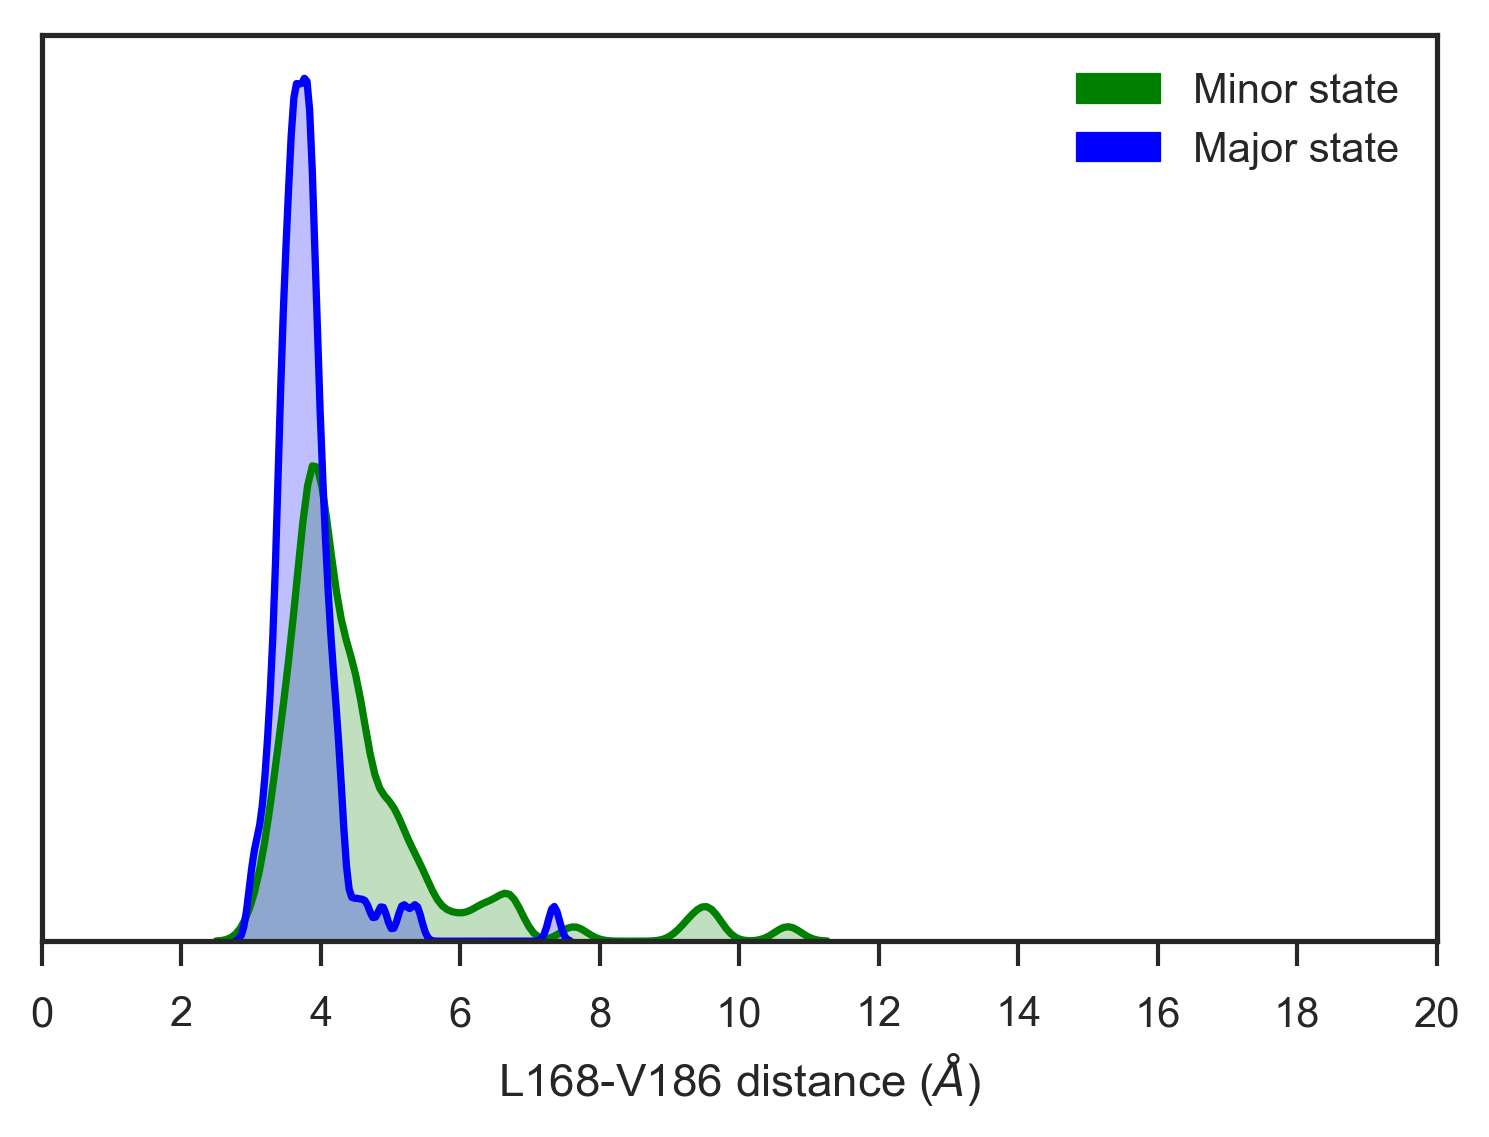

In [395]:
dist = 38

plt.figure(dpi=300)
sns.kdeplot([dist3_[x[0]][x[1]][dist]*10 for x in samples0]*10, color='green', shade=True)
sns.kdeplot([dist3_[x[0]][x[1]][dist]*10 for x in samples1]*10, color='blue', shade=True)
plt.xlabel('L168-V186 distance ($\AA$)')
plt.yticks([])
plt.xlim((0,20))
plt.xticks(range(0,22,2))

patch1 = mpatches.Patch(color='green', label='Minor state')
patch2 = mpatches.Patch(color='blue', label='Major state')
plt.legend(handles=[patch1, patch2])

plt.show()

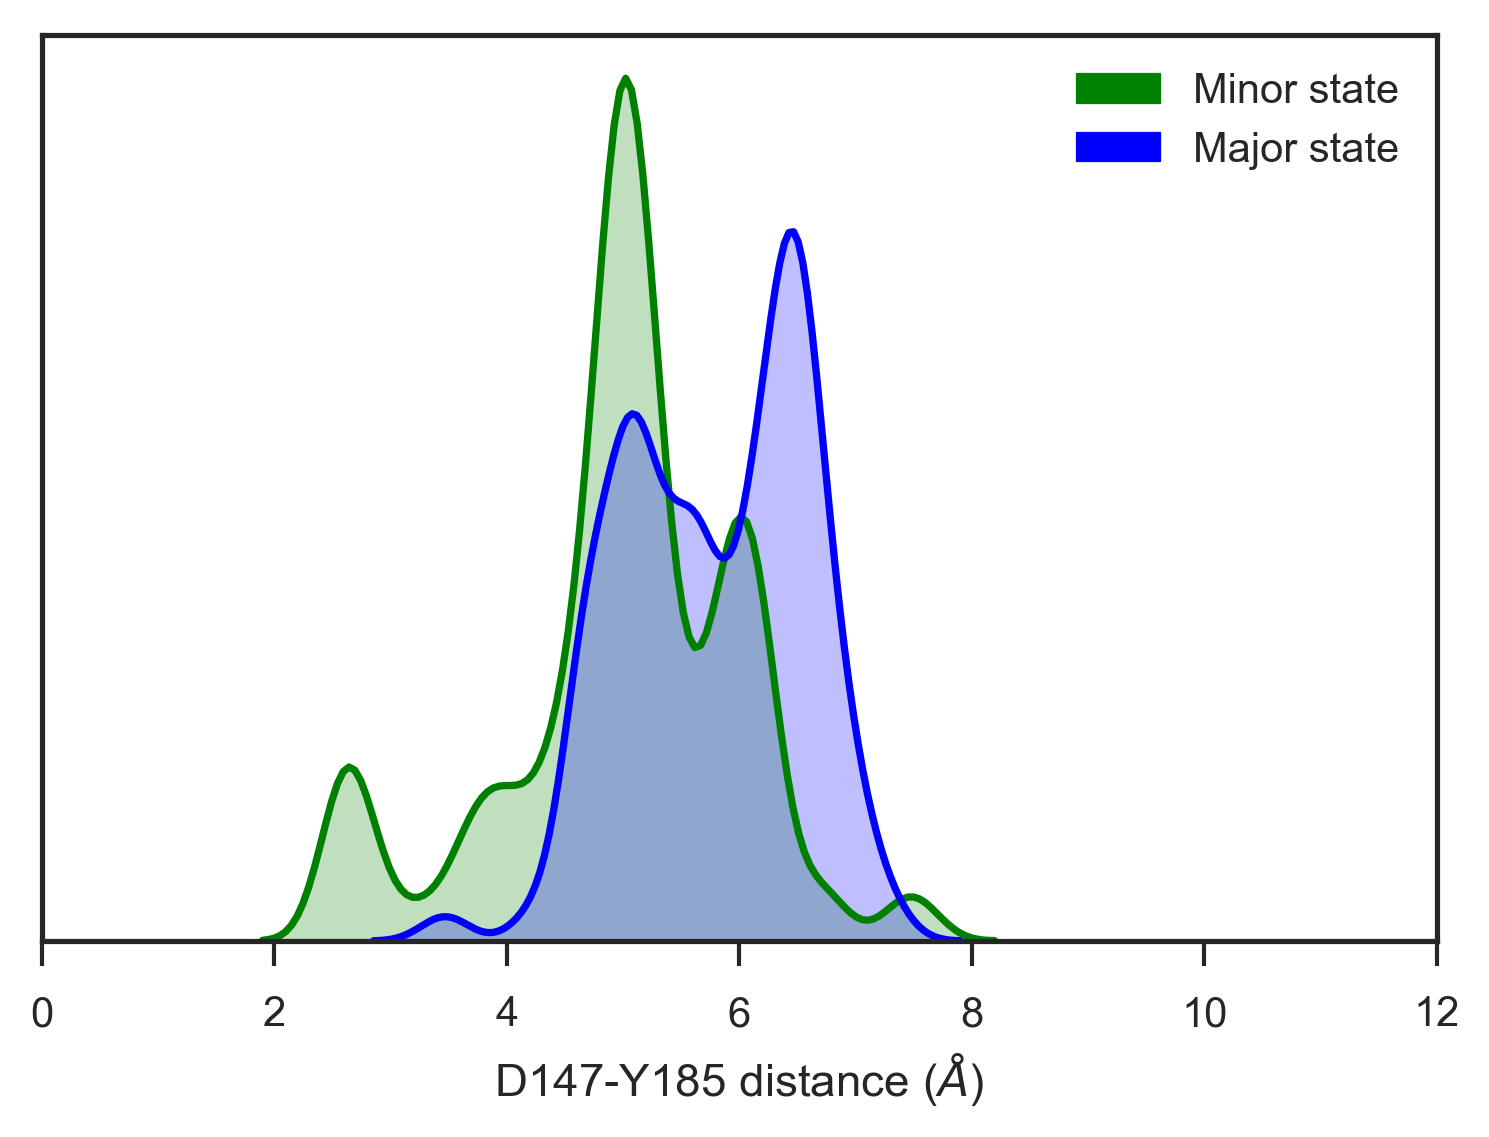

In [396]:
dist = 53 

plt.figure(dpi=300)
sns.kdeplot([dist3_[x[0]][x[1]][dist]*10 for x in samples0]*10, color='green', shade=True)
sns.kdeplot([dist3_[x[0]][x[1]][dist]*10 for x in samples1]*10, color='blue', shade=True)
plt.xlabel('D147-Y185 distance ($\AA$)')
plt.yticks([])
plt.xlim((0,12))
#plt.xticks(range(0,22,2))

patch1 = mpatches.Patch(color='green', label='Minor state')
patch2 = mpatches.Patch(color='blue', label='Major state')
plt.legend(handles=[patch1, patch2])

plt.show()

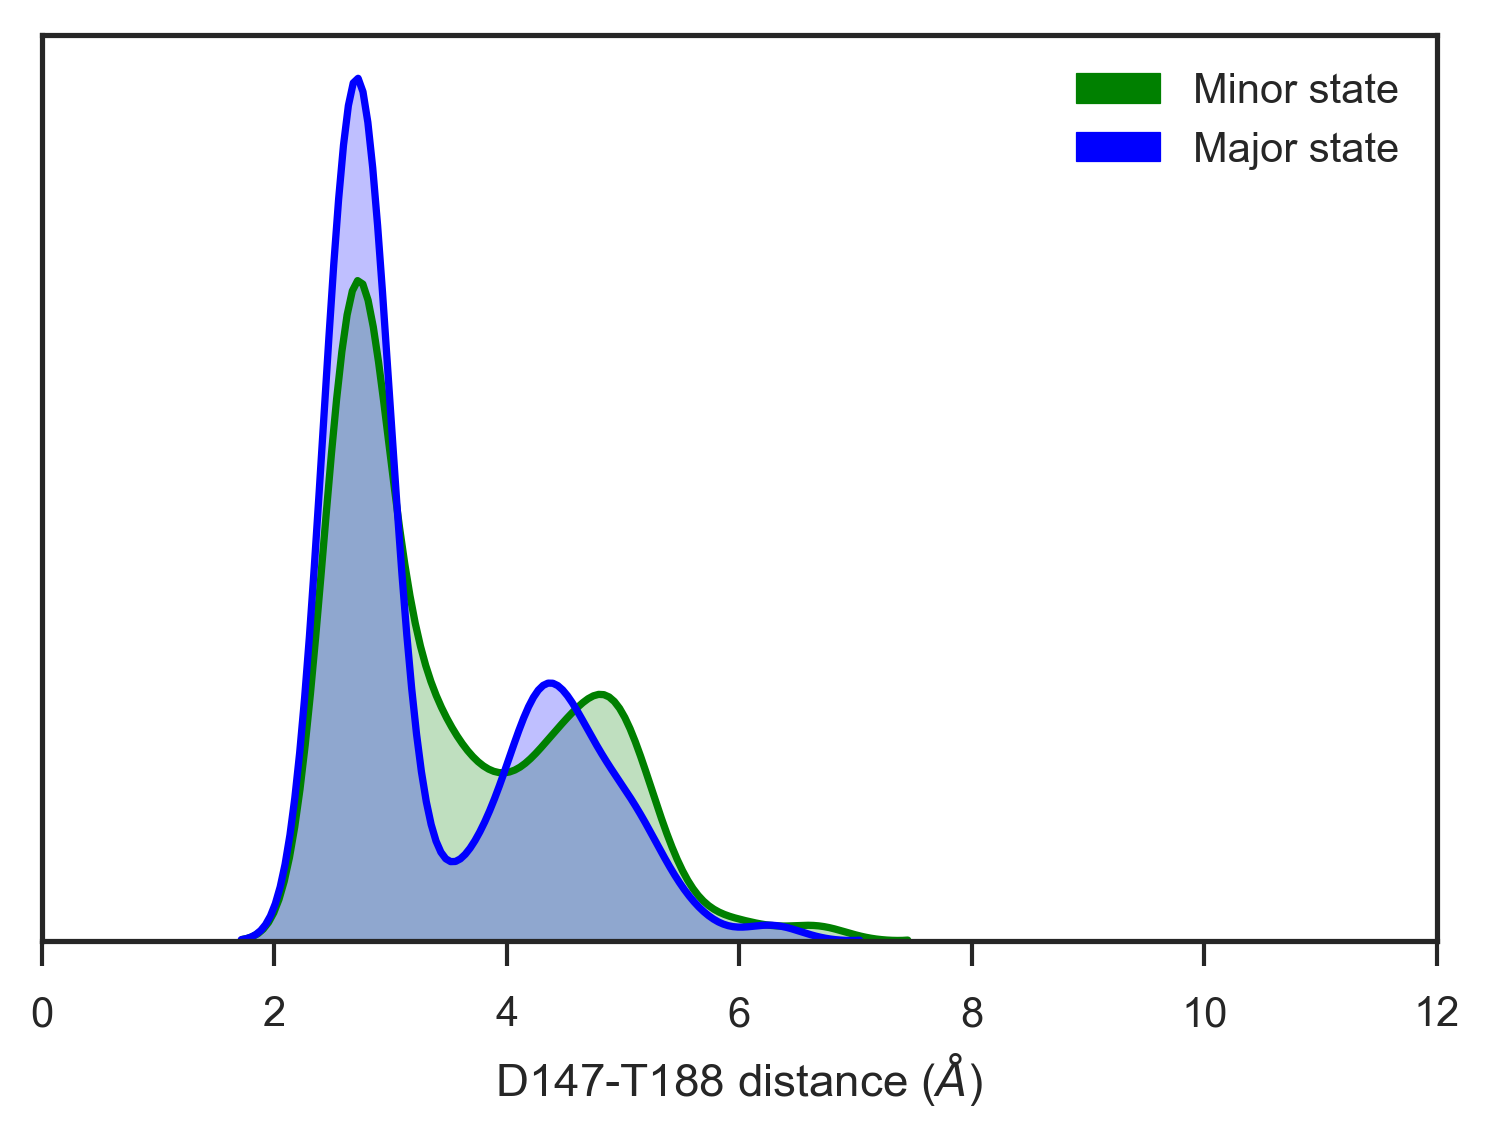

In [397]:
dist = 60

plt.figure(dpi=300)
sns.kdeplot([dist3_[x[0]][x[1]][dist]*10 for x in samples0]*10, color='green', shade=True)
sns.kdeplot([dist3_[x[0]][x[1]][dist]*10 for x in samples1]*10, color='blue', shade=True)
plt.xlabel('D147-T188 distance ($\AA$)')
plt.yticks([])
plt.xlim((0,12))
#plt.xticks(range(0,22,2))

patch1 = mpatches.Patch(color='green', label='Minor state')
patch2 = mpatches.Patch(color='blue', label='Major state')
plt.legend(handles=[patch1, patch2])

plt.show()

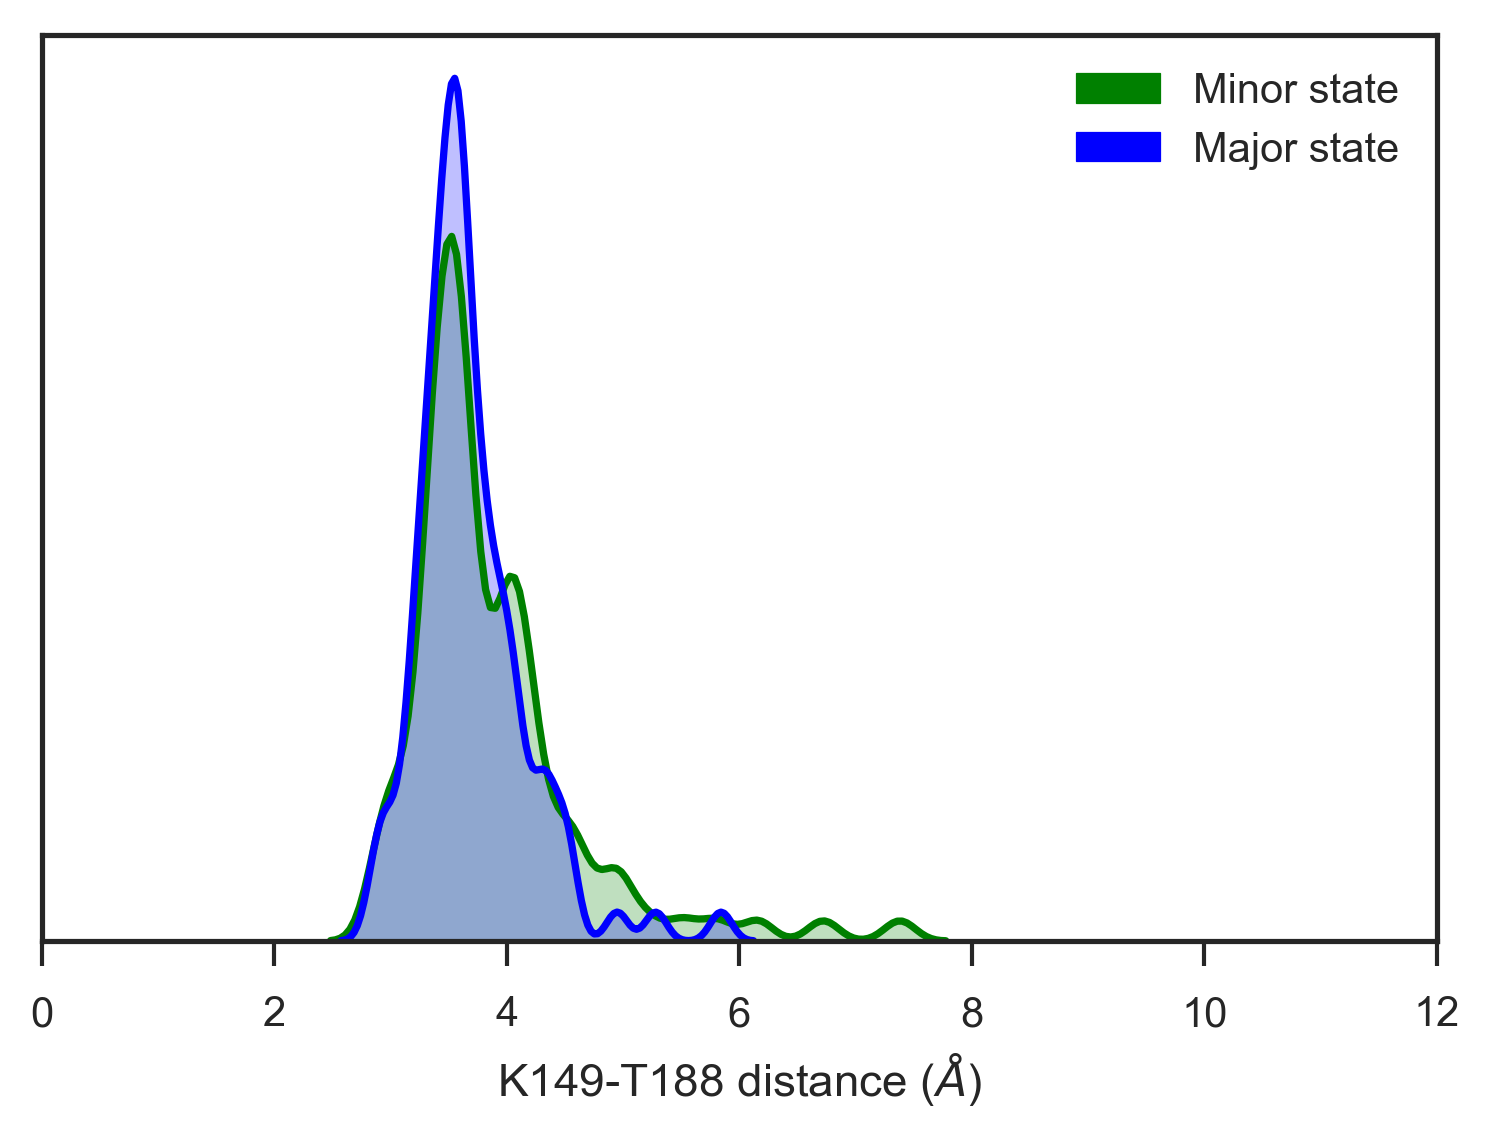

In [403]:
dist = 61

plt.figure(dpi=300)
sns.kdeplot([dist3_[x[0]][x[1]][dist]*10 for x in samples0]*10, color='green', shade=True)
sns.kdeplot([dist3_[x[0]][x[1]][dist]*10 for x in samples1]*10, color='blue', shade=True)
plt.xlabel('K149-T188 distance ($\AA$)')
plt.yticks([])
plt.xlim((0,12))

patch1 = mpatches.Patch(color='green', label='Minor state')
patch2 = mpatches.Patch(color='blue', label='Major state')
plt.legend(handles=[patch1, patch2])

plt.show()

In [404]:
# q103m

In [405]:
samples0 = np.load('joint_statespace_samples/q103m_state0.npy')
samples1 = np.load('joint_statespace_samples/q103m_state1.npy')

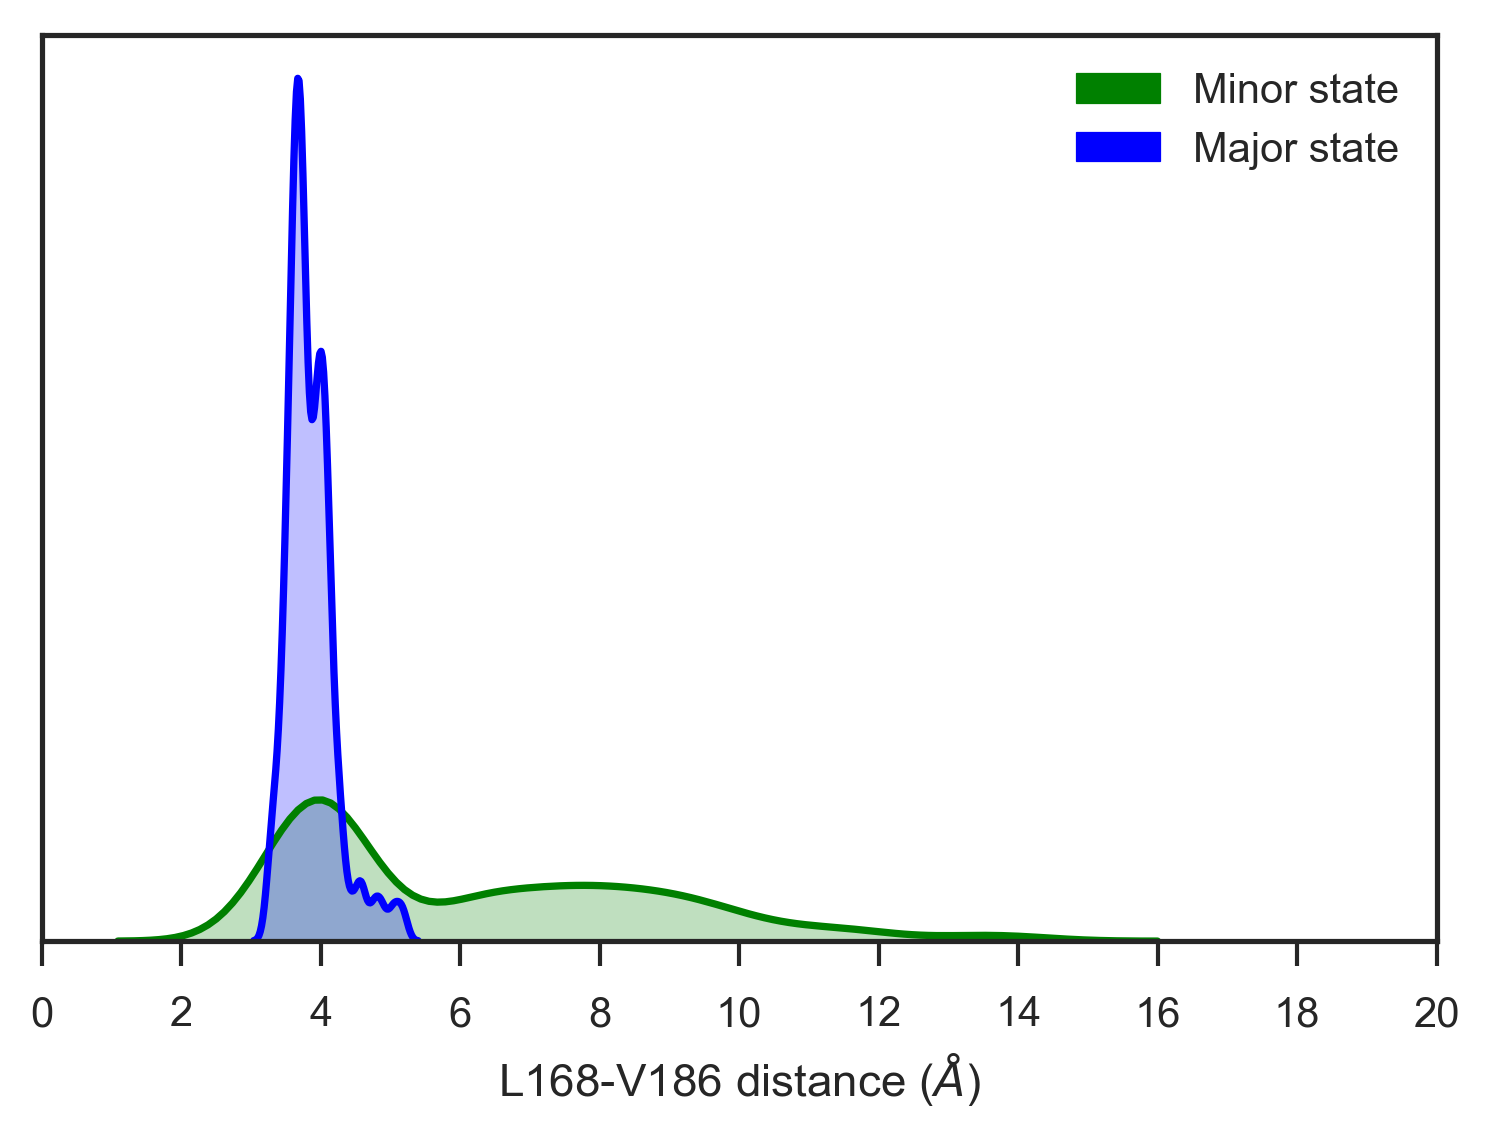

In [406]:
dist = 38

plt.figure(dpi=300)
sns.kdeplot([dist4_[x[0]][x[1]][dist]*10 for x in samples0]*10, color='green', shade=True)
sns.kdeplot([dist4_[x[0]][x[1]][dist]*10 for x in samples1]*10, color='blue', shade=True)
plt.xlabel('L168-V186 distance ($\AA$)')
plt.yticks([])
plt.xlim((0,20))
plt.xticks(range(0,22,2))

patch1 = mpatches.Patch(color='green', label='Minor state')
patch2 = mpatches.Patch(color='blue', label='Major state')
plt.legend(handles=[patch1, patch2])

plt.show()

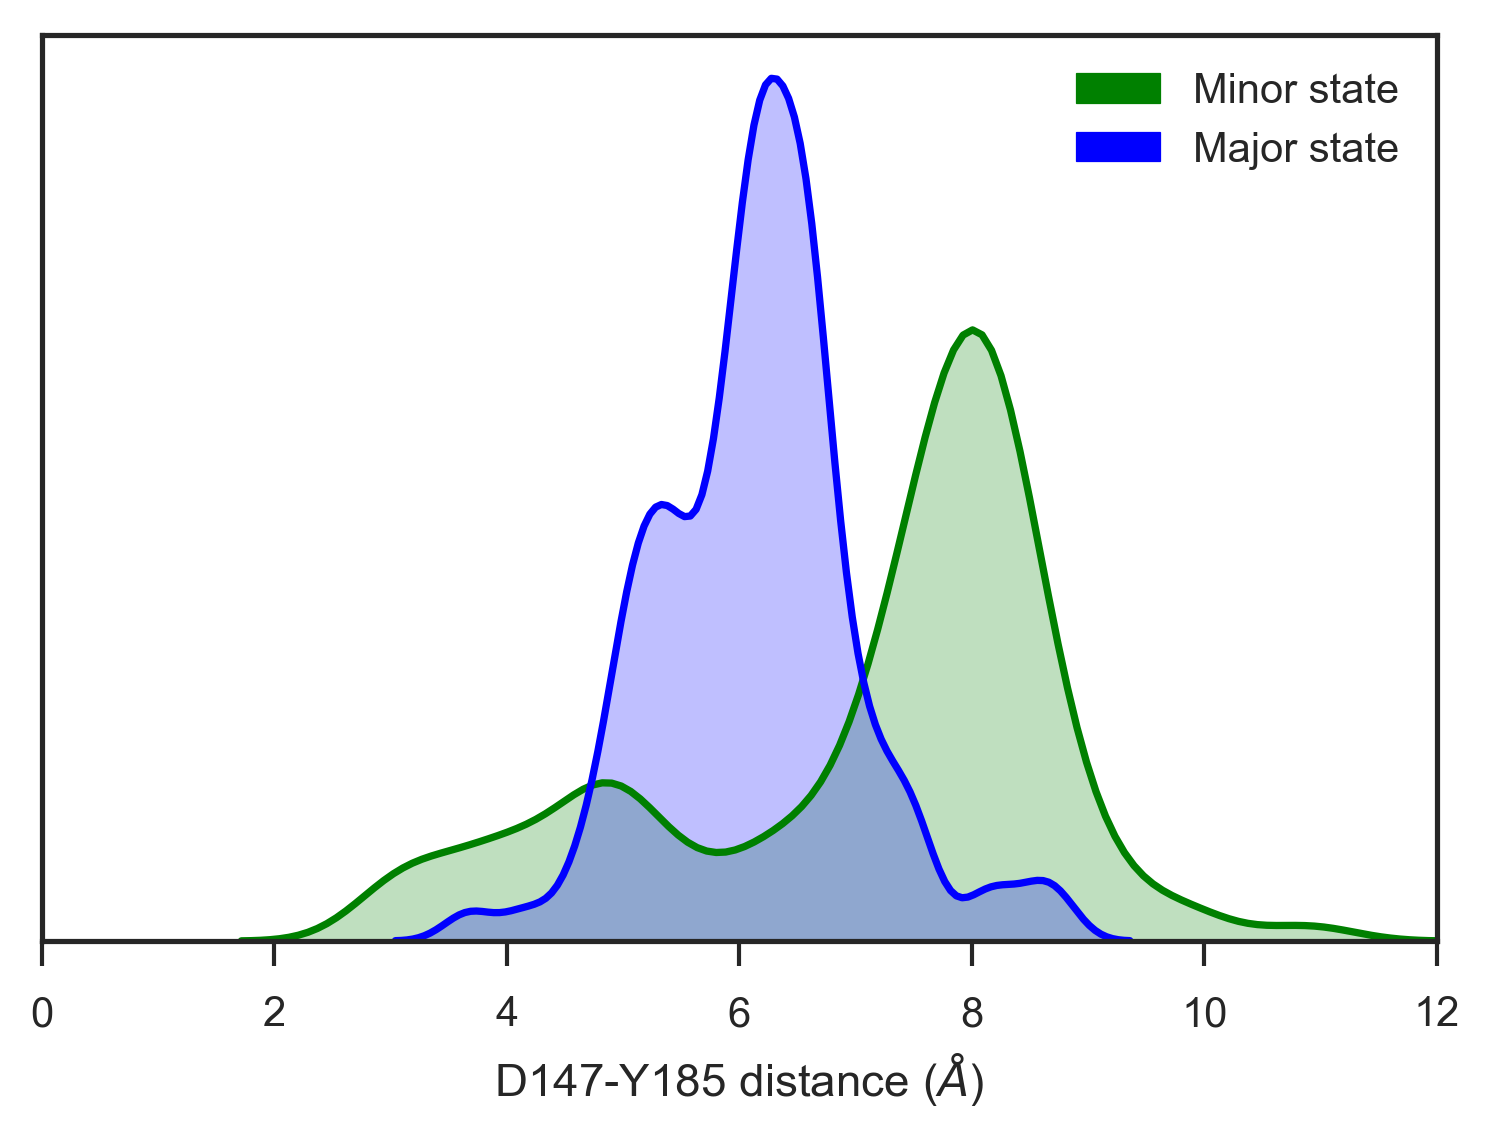

In [407]:
dist = 53 

plt.figure(dpi=300)
sns.kdeplot([dist4_[x[0]][x[1]][dist]*10 for x in samples0]*10, color='green', shade=True)
sns.kdeplot([dist4_[x[0]][x[1]][dist]*10 for x in samples1]*10, color='blue', shade=True)
plt.xlabel('D147-Y185 distance ($\AA$)')
plt.yticks([])
plt.xlim((0,12))
#plt.xticks(range(0,22,2))

patch1 = mpatches.Patch(color='green', label='Minor state')
patch2 = mpatches.Patch(color='blue', label='Major state')
plt.legend(handles=[patch1, patch2])

plt.show()

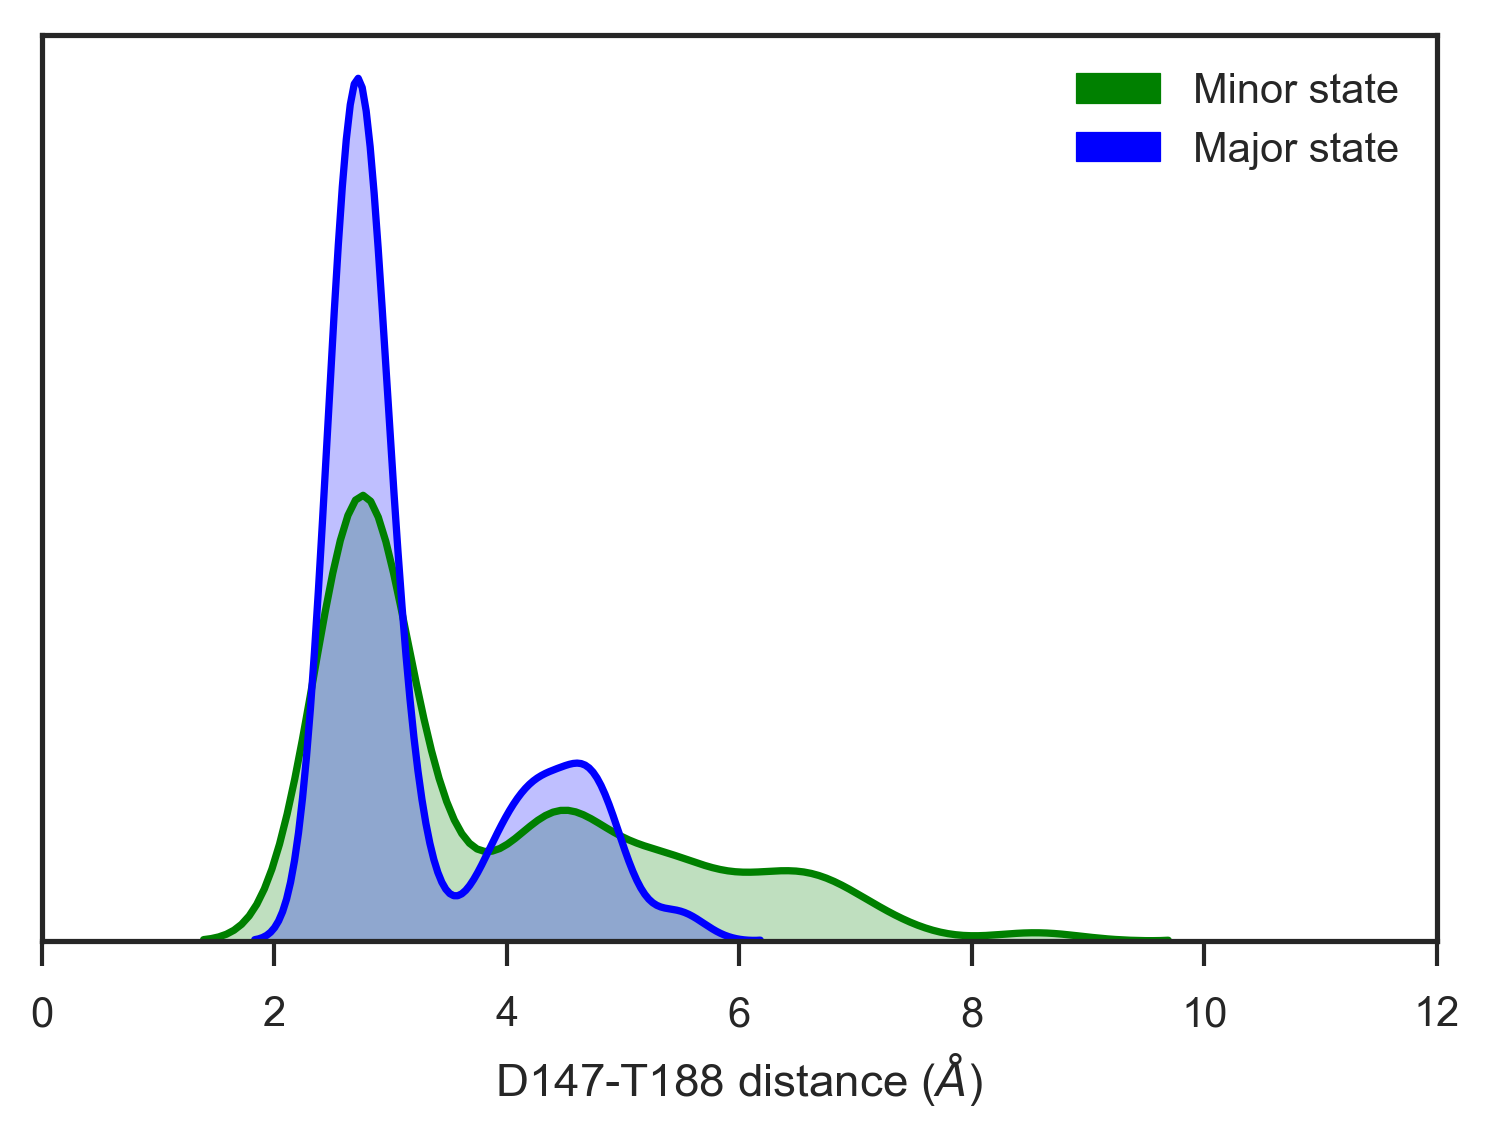

In [408]:
dist = 60

plt.figure(dpi=300)
sns.kdeplot([dist4_[x[0]][x[1]][dist]*10 for x in samples0]*10, color='green', shade=True)
sns.kdeplot([dist4_[x[0]][x[1]][dist]*10 for x in samples1]*10, color='blue', shade=True)
plt.xlabel('D147-T188 distance ($\AA$)')
plt.yticks([])
plt.xlim((0,12))
#plt.xticks(range(0,22,2))

patch1 = mpatches.Patch(color='green', label='Minor state')
patch2 = mpatches.Patch(color='blue', label='Major state')
plt.legend(handles=[patch1, patch2])

plt.show()

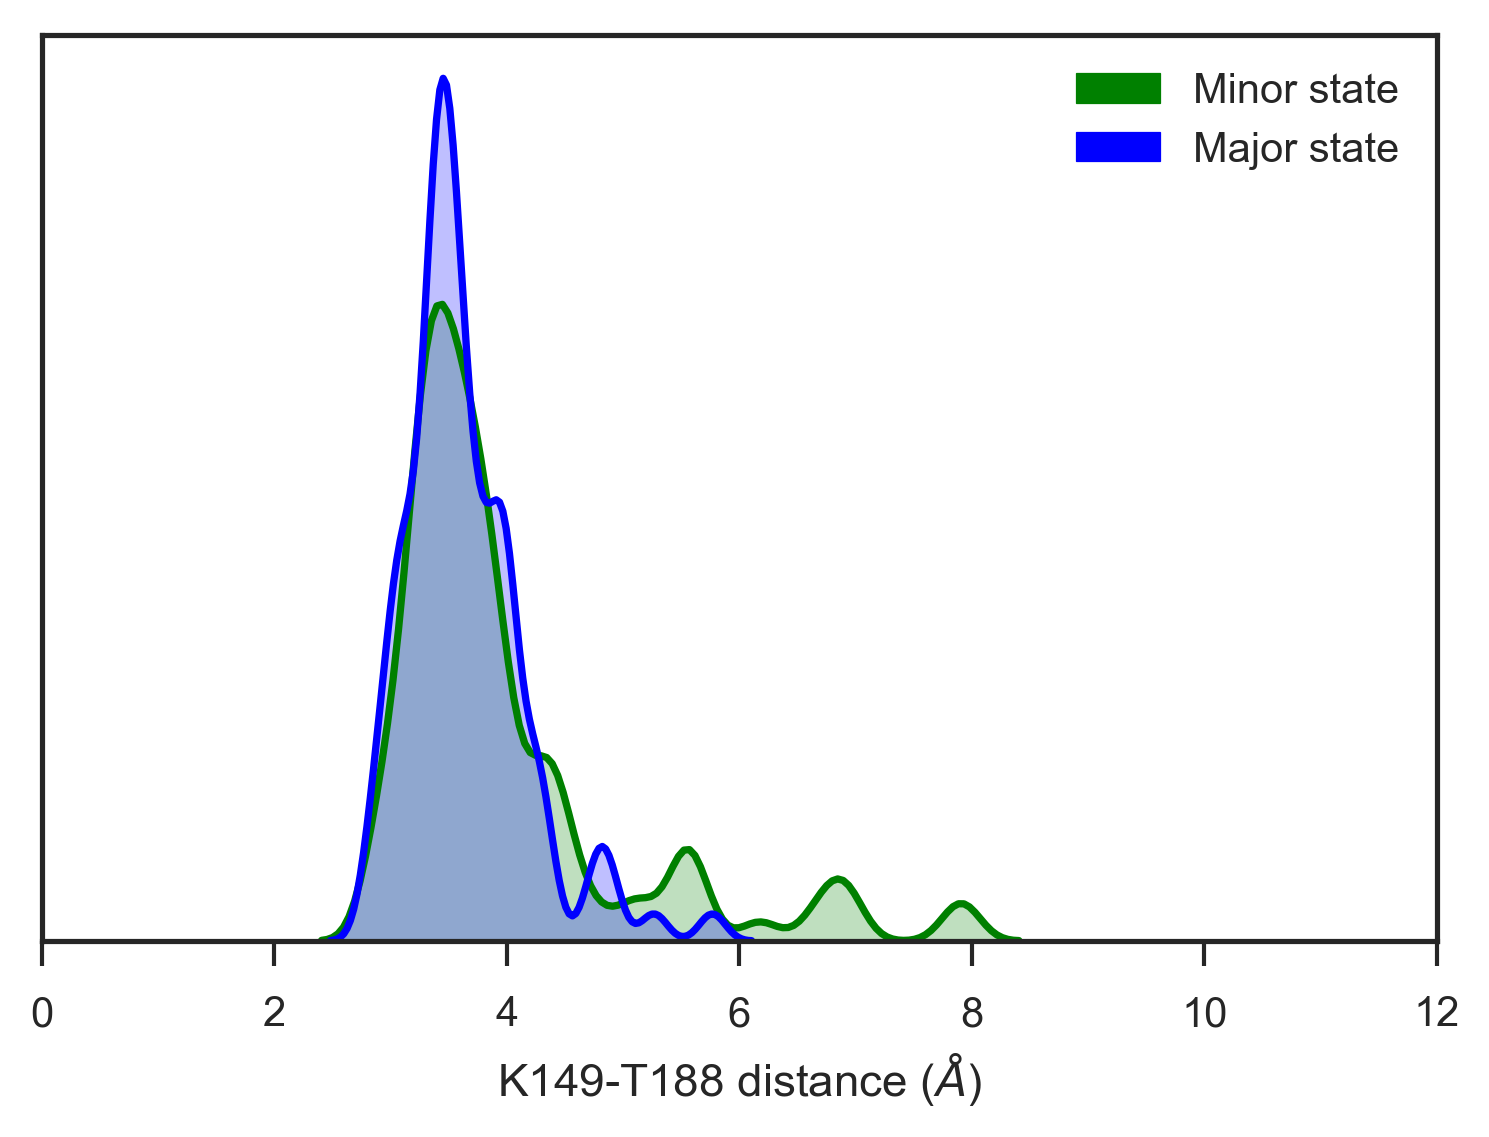

In [409]:
dist = 61

plt.figure(dpi=300)
sns.kdeplot([dist4_[x[0]][x[1]][dist]*10 for x in samples0]*10, color='green', shade=True)
sns.kdeplot([dist4_[x[0]][x[1]][dist]*10 for x in samples1]*10, color='blue', shade=True)
plt.xlabel('K149-T188 distance ($\AA$)')
plt.yticks([])
plt.xlim((0,12))

patch1 = mpatches.Patch(color='green', label='Minor state')
patch2 = mpatches.Patch(color='blue', label='Major state')
plt.legend(handles=[patch1, patch2])

plt.show()

In [410]:
# 55n-q103m

In [411]:
samples0 = np.load('joint_statespace_samples/55n_q103m_state0.npy')
samples1 = np.load('joint_statespace_samples/55n_q103m_state1.npy')

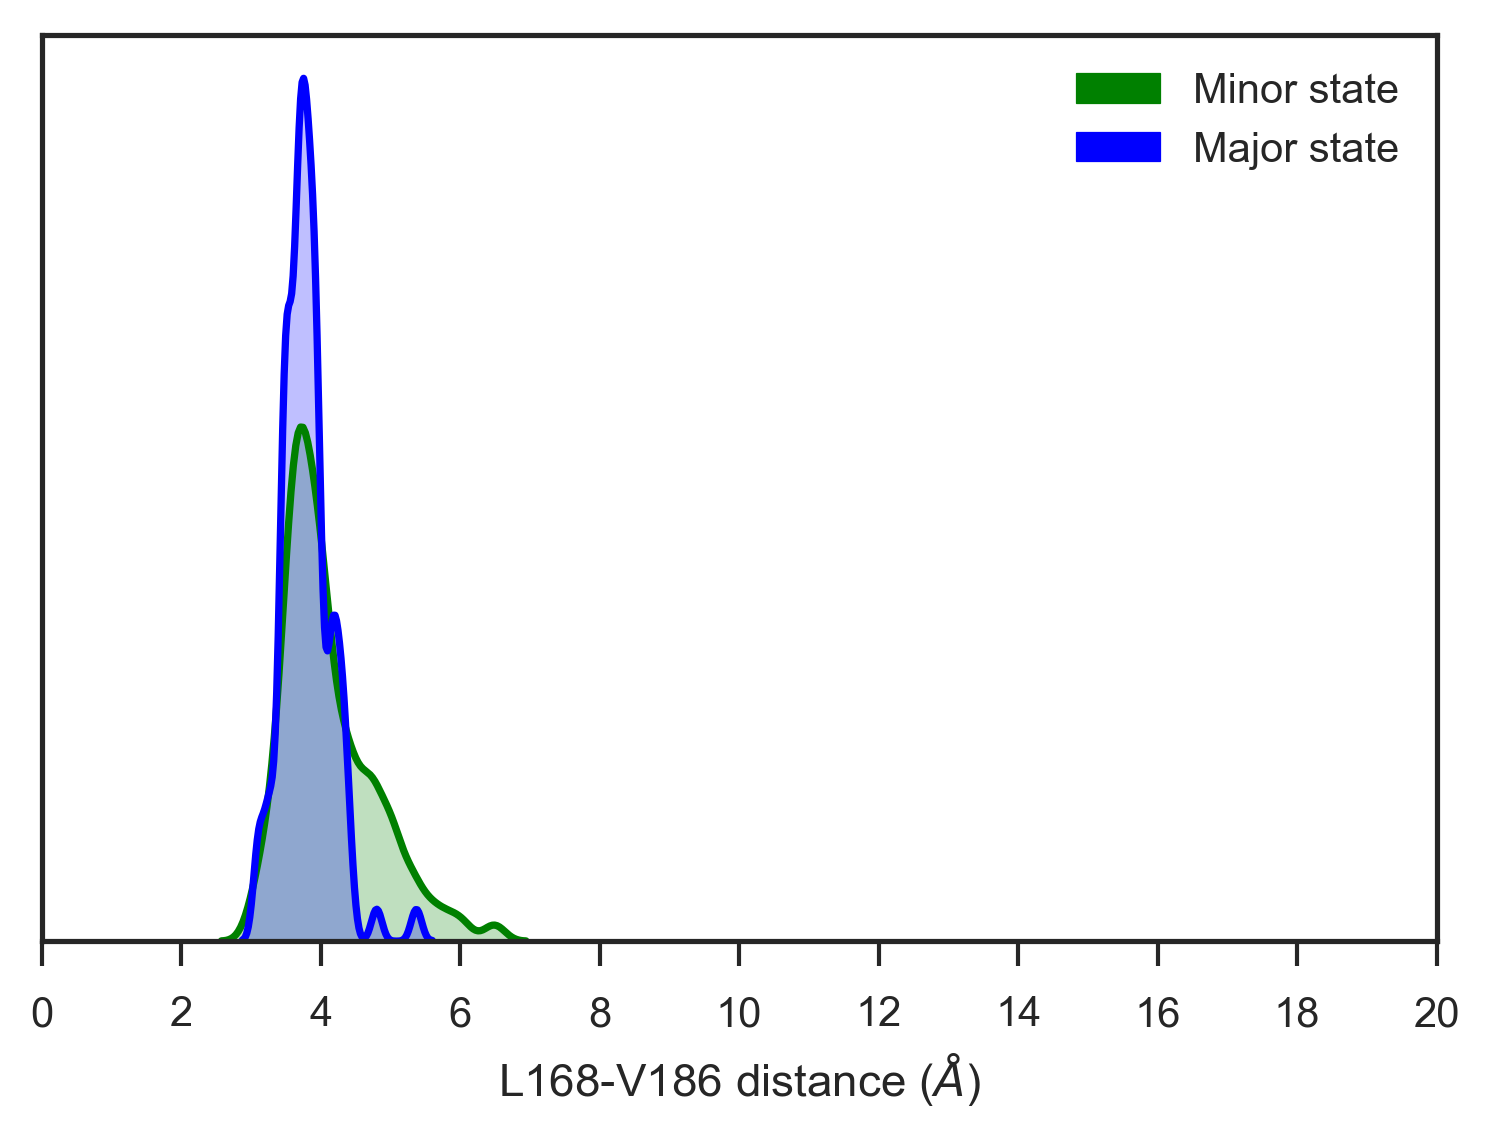

In [412]:
dist = 38

plt.figure(dpi=300)
sns.kdeplot([dist5_[x[0]][x[1]][dist]*10 for x in samples0]*10, color='green', shade=True)
sns.kdeplot([dist5_[x[0]][x[1]][dist]*10 for x in samples1]*10, color='blue', shade=True)
plt.xlabel('L168-V186 distance ($\AA$)')
plt.yticks([])
plt.xlim((0,20))
plt.xticks(range(0,22,2))

patch1 = mpatches.Patch(color='green', label='Minor state')
patch2 = mpatches.Patch(color='blue', label='Major state')
plt.legend(handles=[patch1, patch2])

plt.show()

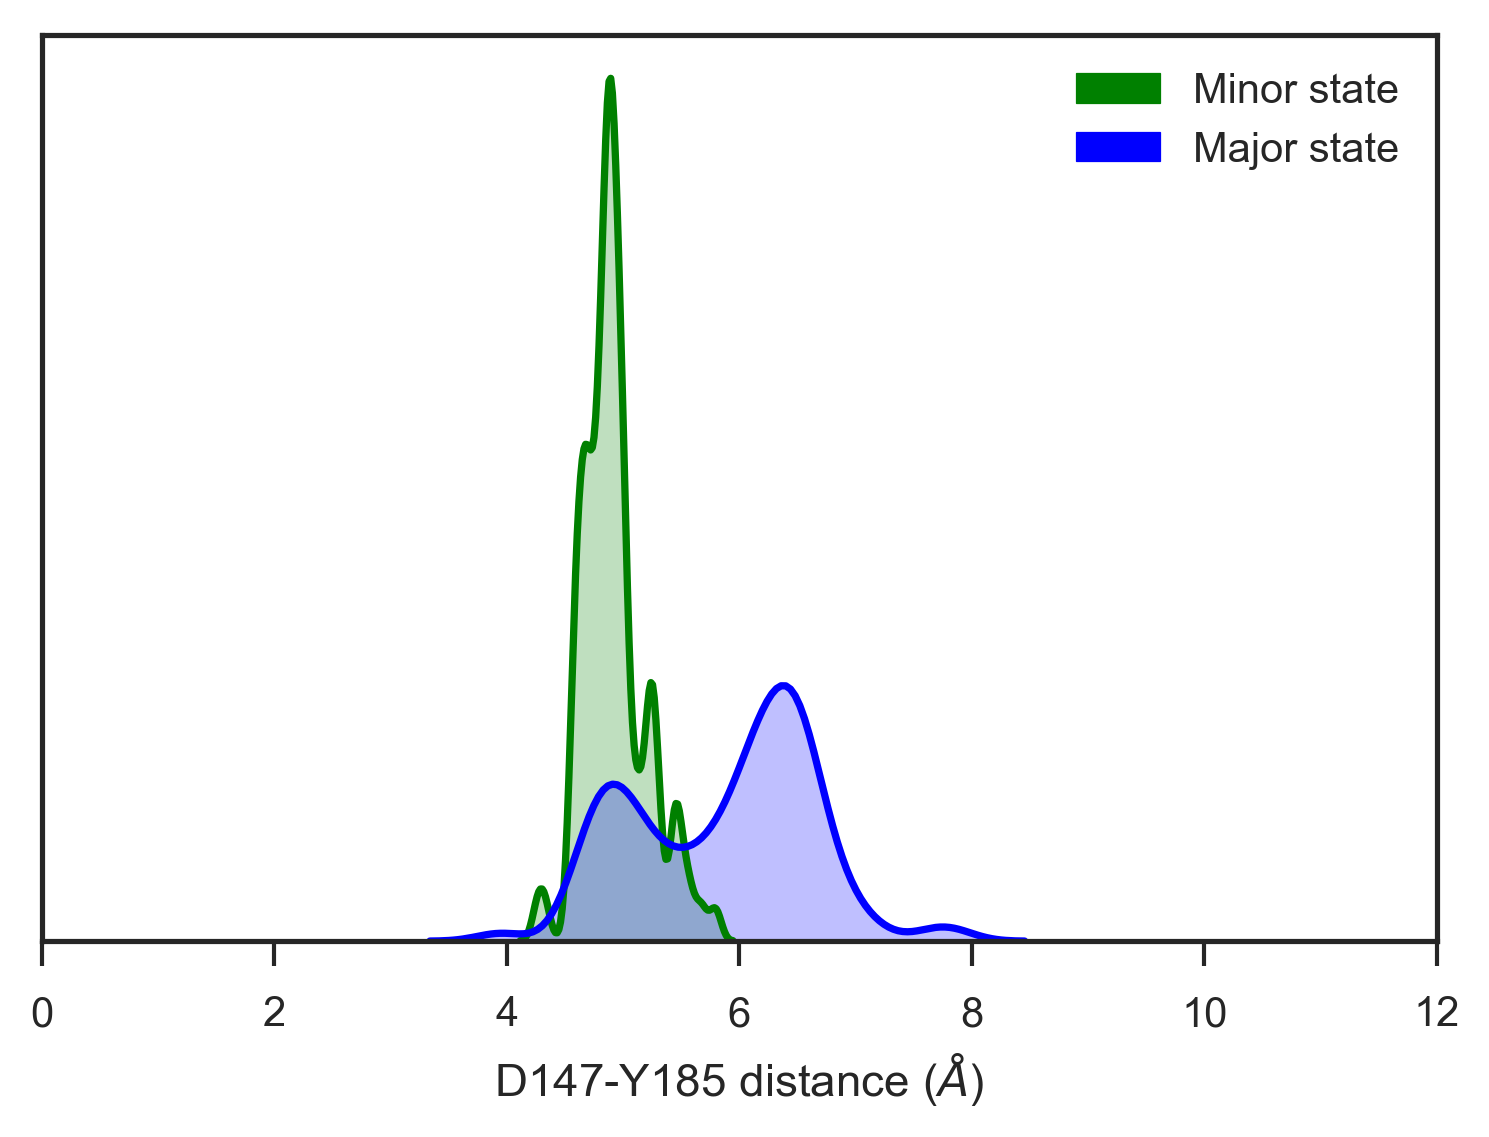

In [413]:
dist = 53 

plt.figure(dpi=300)
sns.kdeplot([dist5_[x[0]][x[1]][dist]*10 for x in samples0]*10, color='green', shade=True)
sns.kdeplot([dist5_[x[0]][x[1]][dist]*10 for x in samples1]*10, color='blue', shade=True)
plt.xlabel('D147-Y185 distance ($\AA$)')
plt.yticks([])
plt.xlim((0,12))
#plt.xticks(range(0,22,2))

patch1 = mpatches.Patch(color='green', label='Minor state')
patch2 = mpatches.Patch(color='blue', label='Major state')
plt.legend(handles=[patch1, patch2])

plt.show()

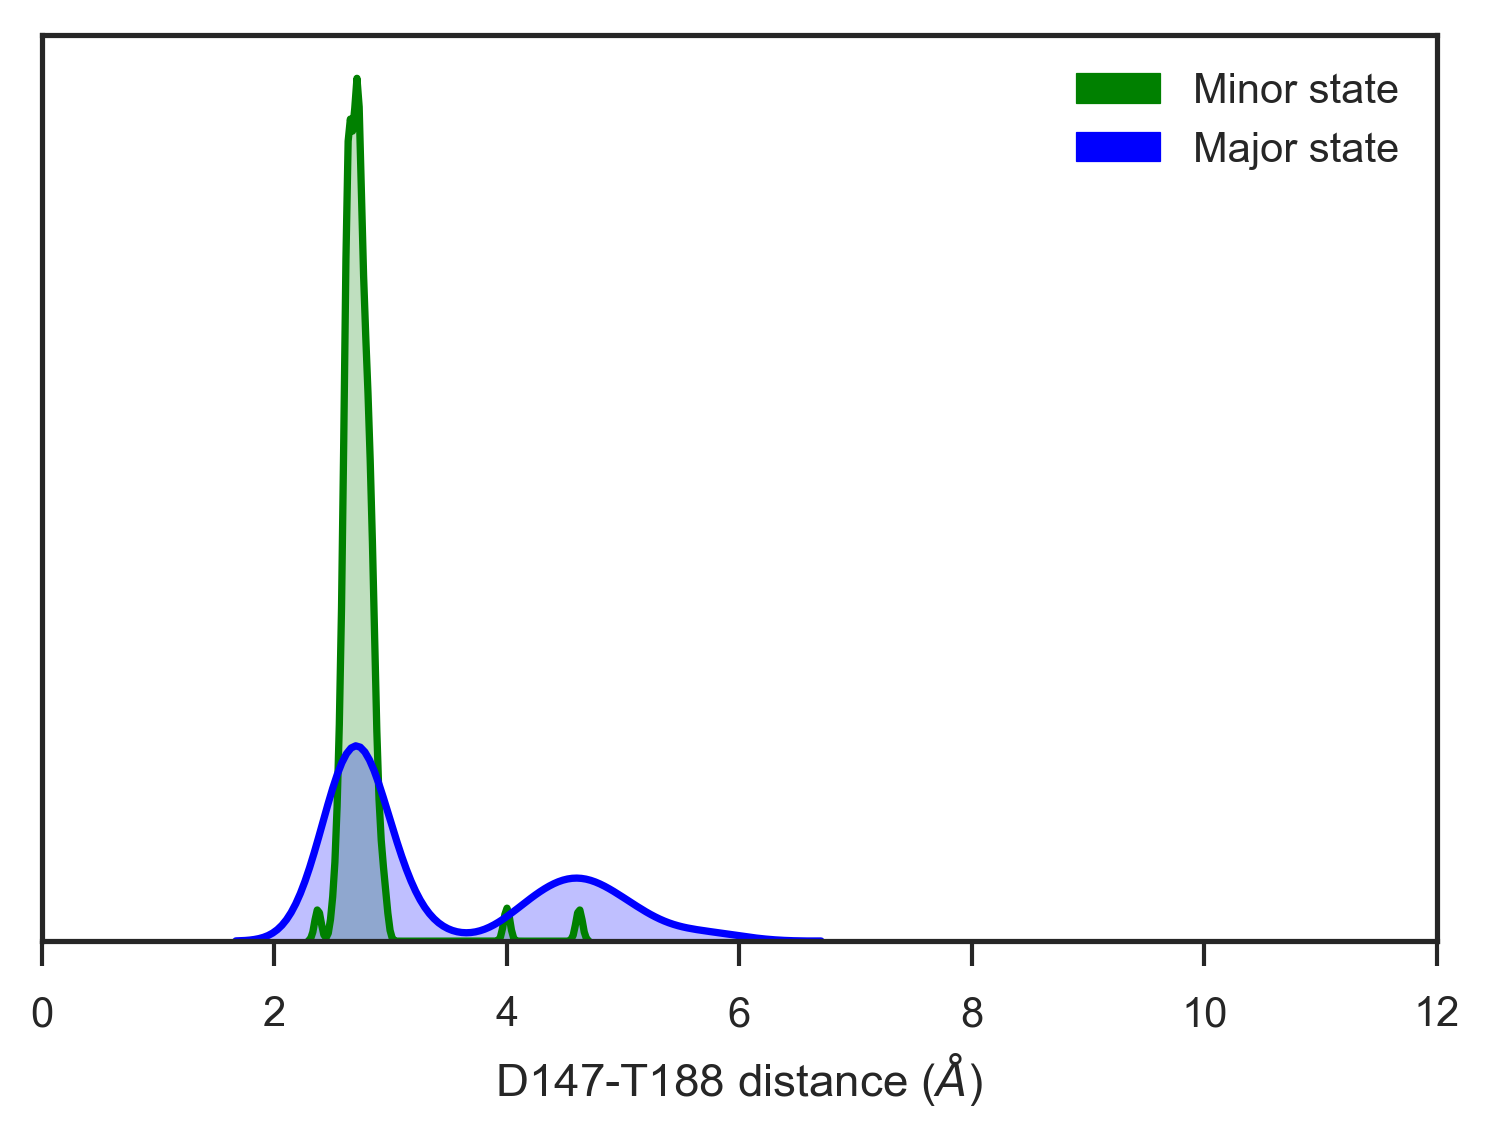

In [415]:
dist = 60

plt.figure(dpi=300)
sns.kdeplot([dist5_[x[0]][x[1]][dist]*10 for x in samples0]*10, color='green', shade=True)
sns.kdeplot([dist5_[x[0]][x[1]][dist]*10 for x in samples1]*10, color='blue', shade=True)
plt.xlabel('D147-T188 distance ($\AA$)')
plt.yticks([])
plt.xlim((0,12))
#plt.xticks(range(0,22,2))

patch1 = mpatches.Patch(color='green', label='Minor state')
patch2 = mpatches.Patch(color='blue', label='Major state')
plt.legend(handles=[patch1, patch2])

plt.show()

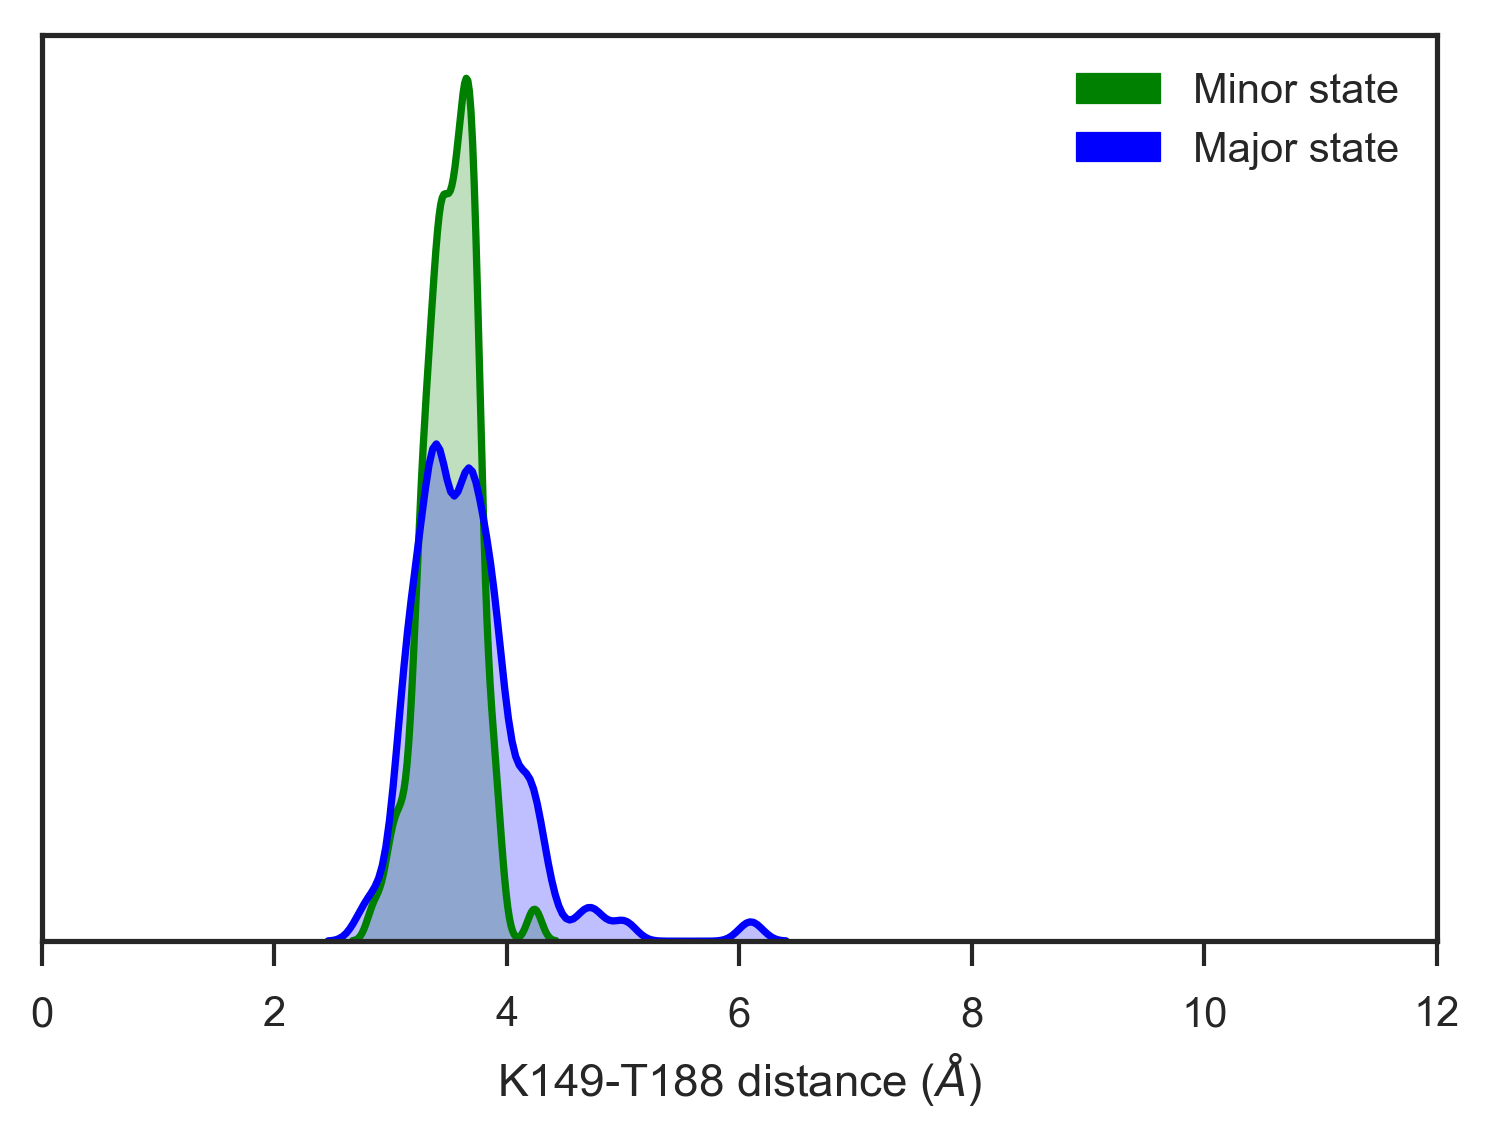

In [416]:
dist = 61

plt.figure(dpi=300)
sns.kdeplot([dist5_[x[0]][x[1]][dist]*10 for x in samples0]*10, color='green', shade=True)
sns.kdeplot([dist5_[x[0]][x[1]][dist]*10 for x in samples1]*10, color='blue', shade=True)
plt.xlabel('K149-T188 distance ($\AA$)')
plt.yticks([])
plt.xlim((0,12))

patch1 = mpatches.Patch(color='green', label='Minor state')
patch2 = mpatches.Patch(color='blue', label='Major state')
plt.legend(handles=[patch1, patch2])

plt.show()

In [417]:
# now calculate differential contact maps

In [418]:
# wt

In [424]:
import mdtraj as md

In [423]:
samples0 = md.load('joint_statespace_samples/wt_state0.dcd', top='../ERK/run2.pdb')
samples1 = md.load('joint_statespace_samples/wt_state1.dcd', top='../ERK/run2.pdb')

In [425]:
contacts0 = md.compute_contacts(samples0)
contacts1 = md.compute_contacts(samples1)

In [464]:
contacts0 = md.geometry.squareform(contacts0[0], contacts0[1])
contacts1 = md.geometry.squareform(contacts1[0], contacts1[1])

In [496]:
contacts0 = (contacts0 > 0.4).astype('int')
contacts1 = (contacts1 > 0.4).astype('int')

In [467]:
contacts0.shape

(100, 357, 357)

In [475]:
np.mean(contacts0, axis=0).shape

(357, 357)

In [498]:
diff = np.mean(contacts0, axis=0) - np.mean(contacts1, axis=0)

In [477]:
diff.shape

(357, 357)

In [504]:
diff_ = np.zeros((diff.shape[0], diff.shape[0]))

for i in range(diff.shape[0]):
    for j in range(diff.shape[1]):
        if diff[i,j] > 0.25 or diff[i,j] < -0.25:
            diff_[i,j] = diff[i,j]
        else:
            diff_[i,j] = np.nan

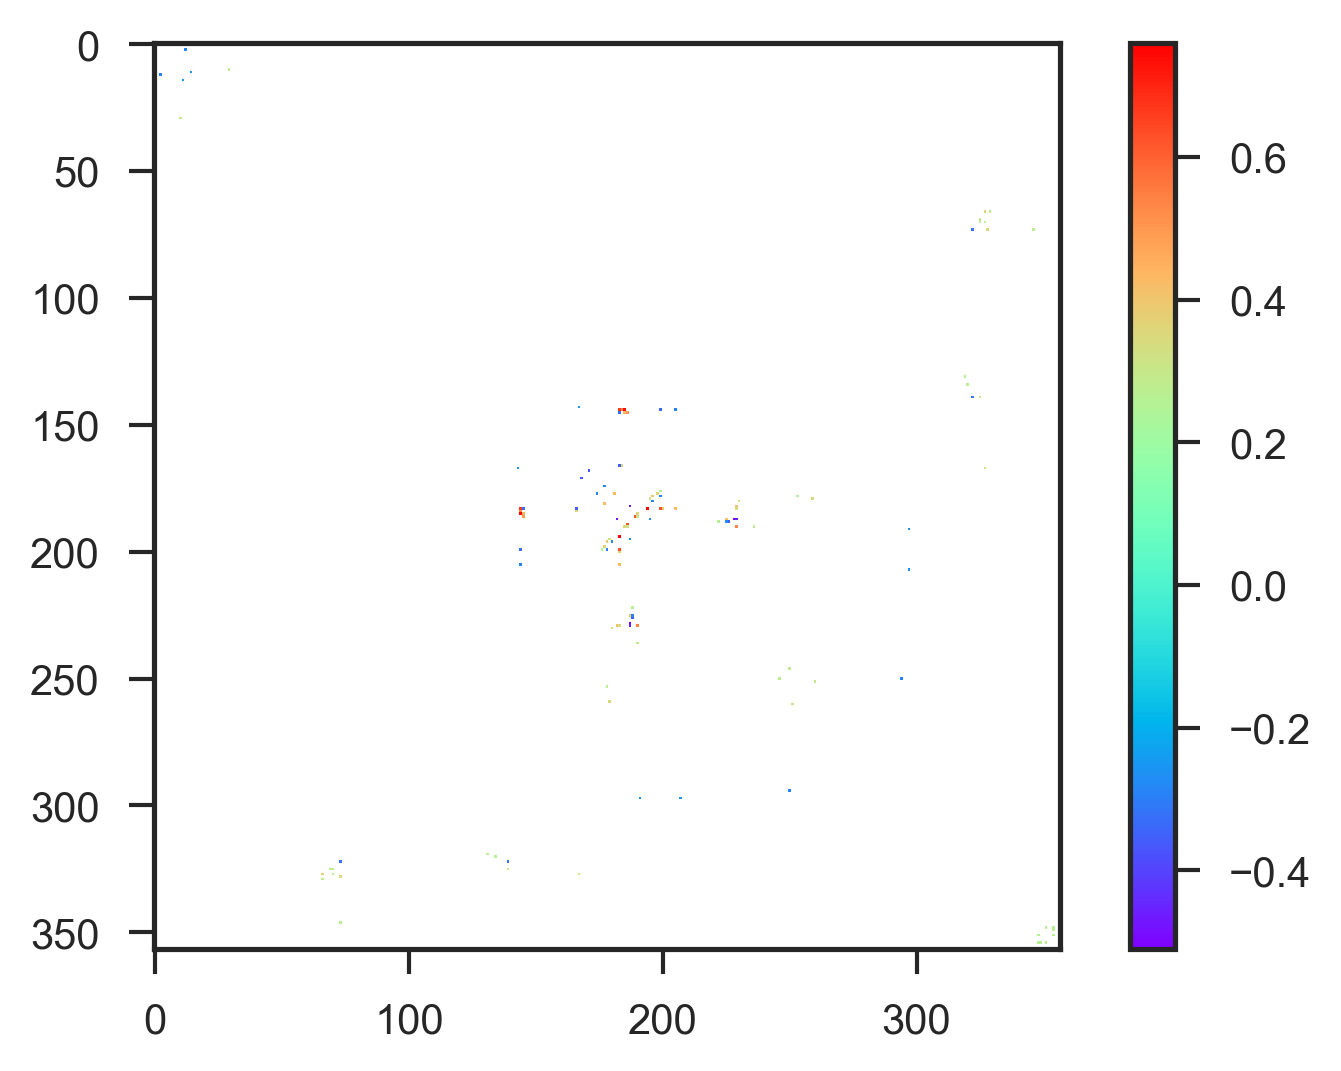

In [506]:
plt.figure(dpi=300)
plt.imshow(diff_, 'rainbow')
plt.colorbar()
plt.show()

In [508]:
np.unravel_index(np.argmax(diff), diff.shape)

(183, 194)

In [509]:
np.unravel_index(np.argmin(diff), diff.shape)

(187, 228)

In [510]:
# ok this is good - let's save absolute sums per residue for plotting in pymol

In [514]:
np.save('joint_statespace_samples/wt_diff_contmap.npy', [np.sum(x) for x in np.abs(diff)])

In [515]:
# 55n

In [516]:
samples0 = md.load('joint_statespace_samples/55n_state0.dcd', top='../ERK/run3.pdb')
samples1 = md.load('joint_statespace_samples/55n_state1.dcd', top='../ERK/run3.pdb')

contacts0 = md.compute_contacts(samples0)
contacts1 = md.compute_contacts(samples1)

contacts0 = md.geometry.squareform(contacts0[0], contacts0[1])
contacts1 = md.geometry.squareform(contacts1[0], contacts1[1])

contacts0 = (contacts0 > 0.4).astype('int')
contacts1 = (contacts1 > 0.4).astype('int')

diff = np.mean(contacts0, axis=0) - np.mean(contacts1, axis=0)

np.save('joint_statespace_samples/55n_diff_contmap.npy', [np.sum(x) for x in np.abs(diff)])

In [517]:
samples0 = md.load('joint_statespace_samples/q103m_state0.dcd', top='../ERK/run4.pdb')
samples1 = md.load('joint_statespace_samples/q103m_state1.dcd', top='../ERK/run4.pdb')

contacts0 = md.compute_contacts(samples0)
contacts1 = md.compute_contacts(samples1)

contacts0 = md.geometry.squareform(contacts0[0], contacts0[1])
contacts1 = md.geometry.squareform(contacts1[0], contacts1[1])

contacts0 = (contacts0 > 0.4).astype('int')
contacts1 = (contacts1 > 0.4).astype('int')

diff = np.mean(contacts0, axis=0) - np.mean(contacts1, axis=0)

np.save('joint_statespace_samples/q103m_diff_contmap.npy', [np.sum(x) for x in np.abs(diff)])

In [518]:
samples0 = md.load('joint_statespace_samples/55n_q103m_state0.dcd', top='../ERK/run5.pdb')
samples1 = md.load('joint_statespace_samples/55n_q103m_state1.dcd', top='../ERK/run5.pdb')

contacts0 = md.compute_contacts(samples0)
contacts1 = md.compute_contacts(samples1)

contacts0 = md.geometry.squareform(contacts0[0], contacts0[1])
contacts1 = md.geometry.squareform(contacts1[0], contacts1[1])

contacts0 = (contacts0 > 0.4).astype('int')
contacts1 = (contacts1 > 0.4).astype('int')

diff = np.mean(contacts0, axis=0) - np.mean(contacts1, axis=0)

np.save('joint_statespace_samples/55n_q103m_diff_contmap.npy', [np.sum(x) for x in np.abs(diff)])

In [ ]:
# plot these now

In [1]:
# have to convert to .txt

In [5]:
wt = np.load('joint_statespace_samples/wt_diff_contmap.npy')
ins = np.load('joint_statespace_samples/55n_diff_contmap.npy')
mut = np.load('joint_statespace_samples/q103m_diff_contmap.npy')
ins_mut = np.load('joint_statespace_samples/55n_q103m_diff_contmap.npy')

In [8]:
np.savetxt('joint_statespace_samples/wt_diff_contmap.txt', wt)
np.savetxt('joint_statespace_samples/55n_diff_contmap.txt', ins)
np.savetxt('joint_statespace_samples/q103m_diff_contmap.txt', mut)
np.savetxt('joint_statespace_samples/55n_q103m_diff_contmap.txt', ins_mut)

In [9]:
# the ins_mut results are rather suspicious -- a lot of changes -- let's have a further look

In [13]:
samples0 = md.load('joint_statespace_samples/55n_q103m_state0.dcd', top='../ERK/run5.pdb')
samples1 = md.load('joint_statespace_samples/55n_q103m_state1.dcd', top='../ERK/run5.pdb')

contacts0 = md.compute_contacts(samples0)
contacts1 = md.compute_contacts(samples1)

contacts0 = md.geometry.squareform(contacts0[0], contacts0[1])
contacts1 = md.geometry.squareform(contacts1[0], contacts1[1])

contacts0 = (contacts0 > 0.4).astype('int')
contacts1 = (contacts1 > 0.4).astype('int')

diff = np.mean(contacts0, axis=0) - np.mean(contacts1, axis=0)

In [14]:
diff_ = np.zeros((diff.shape[0], diff.shape[0]))

for i in range(diff.shape[0]):
    for j in range(diff.shape[1]):
        if diff[i,j] > 0.25 or diff[i,j] < -0.25:
            diff_[i,j] = diff[i,j]
        else:
            diff_[i,j] = np.nan

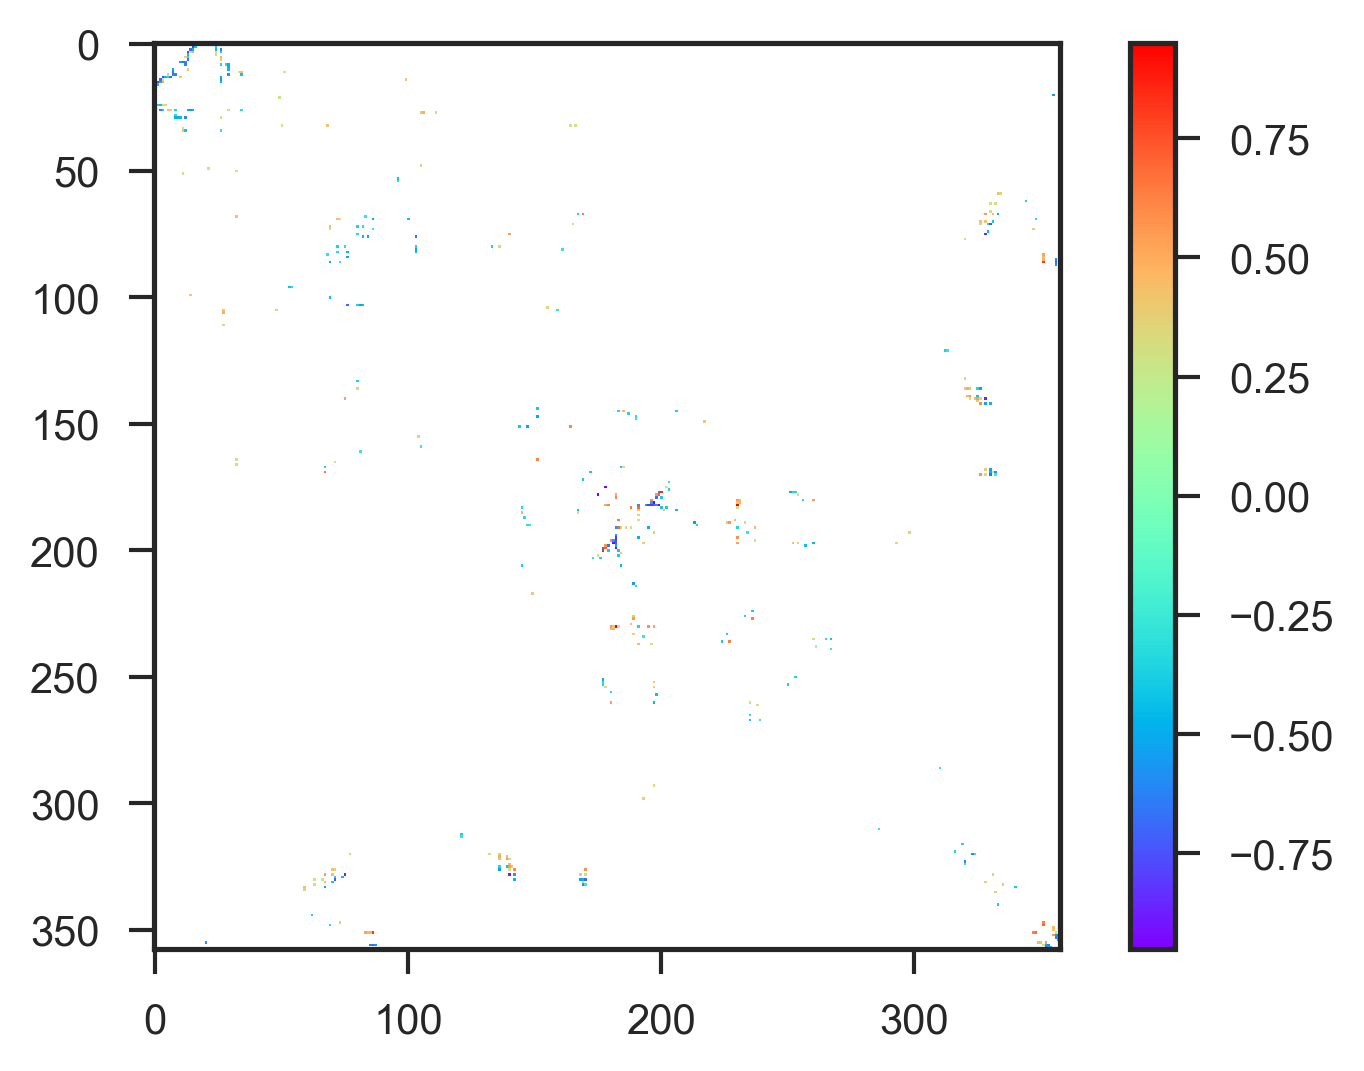

In [15]:
plt.figure(dpi=300)
plt.imshow(diff_, 'rainbow')
plt.colorbar()
plt.show()

In [16]:
# let's look at mut and ins to compare (we have wt above)

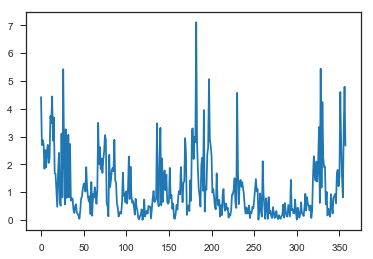

In [19]:
plt.plot([np.sum(x) for x in np.abs(diff)])

In [20]:
samples0 = md.load('joint_statespace_samples/55n_state0.dcd', top='../ERK/run3.pdb')
samples1 = md.load('joint_statespace_samples/55n_state1.dcd', top='../ERK/run3.pdb')

contacts0 = md.compute_contacts(samples0)
contacts1 = md.compute_contacts(samples1)

contacts0 = md.geometry.squareform(contacts0[0], contacts0[1])
contacts1 = md.geometry.squareform(contacts1[0], contacts1[1])

contacts0 = (contacts0 > 0.4).astype('int')
contacts1 = (contacts1 > 0.4).astype('int')

diff = np.mean(contacts0, axis=0) - np.mean(contacts1, axis=0)

In [21]:
diff_ = np.zeros((diff.shape[0], diff.shape[0]))

for i in range(diff.shape[0]):
    for j in range(diff.shape[1]):
        if diff[i,j] > 0.25 or diff[i,j] < -0.25:
            diff_[i,j] = diff[i,j]
        else:
            diff_[i,j] = np.nan

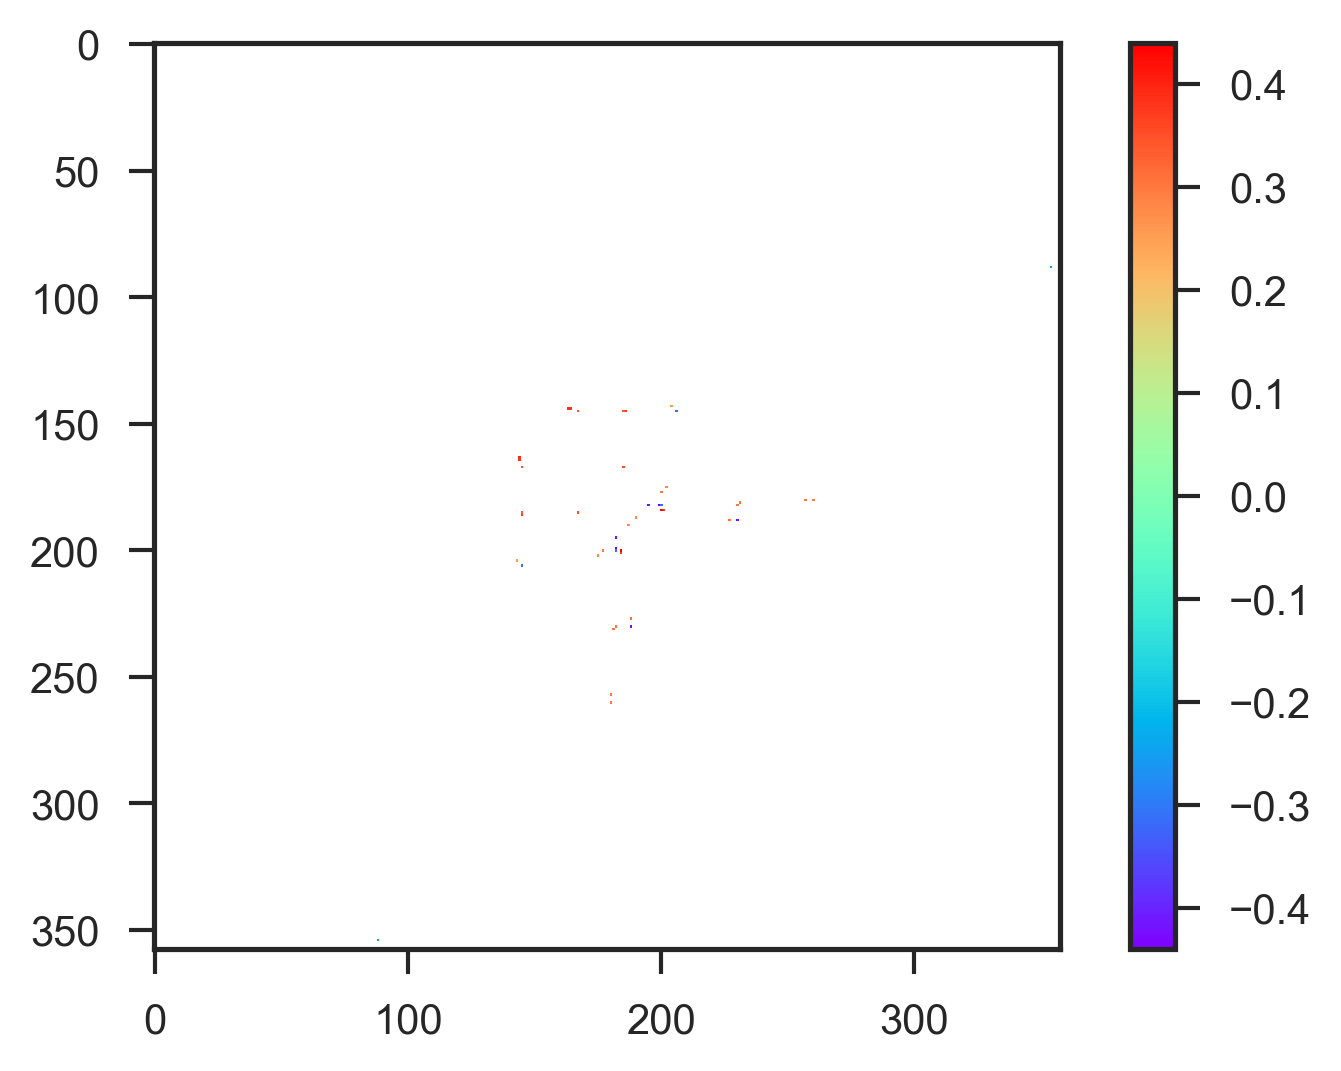

In [22]:
plt.figure(dpi=300)
plt.imshow(diff_, 'rainbow')
plt.colorbar()
plt.show()

In [26]:
samples0 = md.load('joint_statespace_samples/q103m_state0.dcd', top='../ERK/run4.pdb')
samples1 = md.load('joint_statespace_samples/q103m_state1.dcd', top='../ERK/run4.pdb')

contacts0 = md.compute_contacts(samples0)
contacts1 = md.compute_contacts(samples1)

contacts0 = md.geometry.squareform(contacts0[0], contacts0[1])
contacts1 = md.geometry.squareform(contacts1[0], contacts1[1])

contacts0 = (contacts0 > 0.4).astype('int')
contacts1 = (contacts1 > 0.4).astype('int')

diff = np.mean(contacts0, axis=0) - np.mean(contacts1, axis=0)

In [27]:
diff_ = np.zeros((diff.shape[0], diff.shape[0]))

for i in range(diff.shape[0]):
    for j in range(diff.shape[1]):
        if diff[i,j] > 0.25 or diff[i,j] < -0.25:
            diff_[i,j] = diff[i,j]
        else:
            diff_[i,j] = np.nan

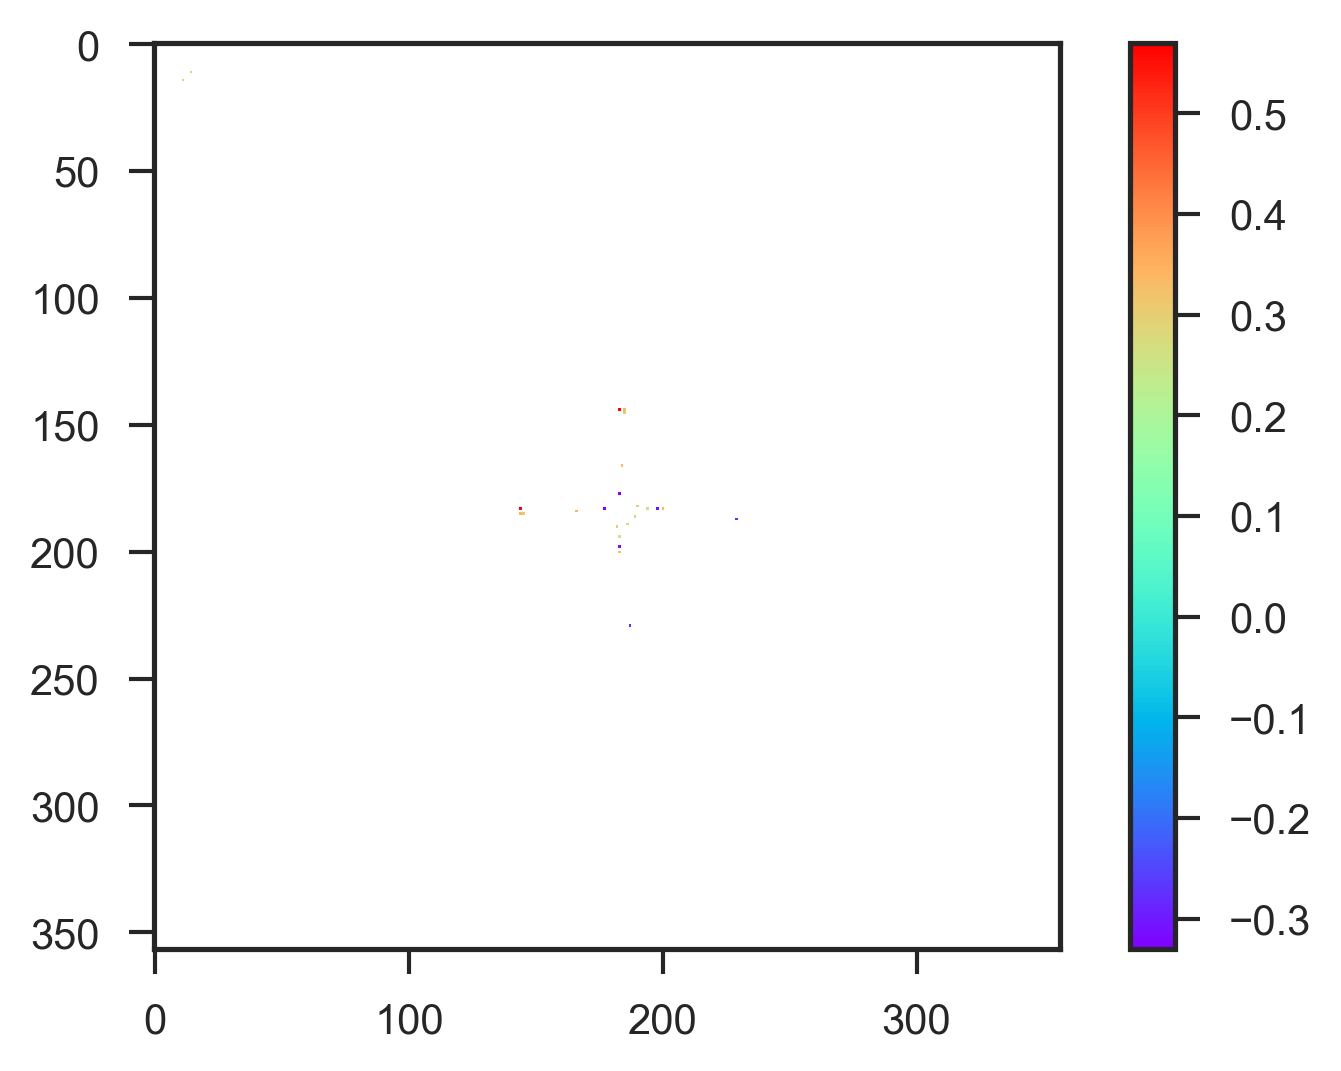

In [28]:
plt.figure(dpi=300)
plt.imshow(diff_, 'rainbow')
plt.colorbar()
plt.show()

In [ ]:
# let's try a different way of calculating changes - now we'll do a +/-, by 